## SAG

In [1]:
# Importar los paquetes necesarios
%matplotlib inline
import matplotlib.pyplot as plt
import kedro
import pandas as pd
import numpy as np
import seaborn as sns
#plt.style.use('ggplot')
import seaborn as sns

from random import seed
from random import random
from random import randint

from model_utils import *
SMALL_SIZE = 12
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rcParams['figure.figsize'] = [10, 5]

%reload_kedro

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/miniconda/envs/optimus/lib/python3.7/site-packages/kedro/framework/context/context.py:624: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/optimus/conf/base', '/optimus/conf/local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  str(exc)


2020-12-04 03:42:34,030 - root - INFO - ** Kedro project Project Clisham
2020-12-04 03:42:34,033 - root - INFO - Defined global variable `context` and `catalog`
2020-12-04 03:42:34,041 - root - INFO - Registered line magic `run_viz`


In [35]:
fsag_train = context.io.load('fsag_cluster3.train_set')
td = context.io.load('td')

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/miniconda/envs/optimus/lib/python3.7/site-packages/kedro/framework/context/context.py:624: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/optimus/conf/base', '/optimus/conf/local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  str(exc)


2020-12-04 04:02:07,100 - kedro.io.data_catalog - INFO - Loading data from `fsag_cluster3.train_set` (CSVDataSet)...
2020-12-04 04:02:10,241 - kedro.io.data_catalog - INFO - Loading data from `td` (PickleDataSet)...


/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

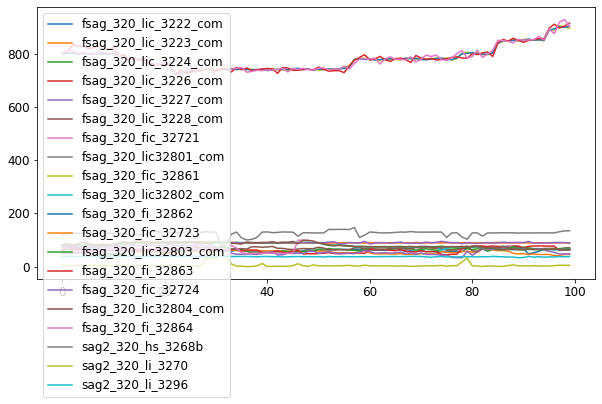

In [42]:
fsag_target = fsag_train[td.select('target','fsag_target')]
fsag_features = fsag_train[td.select('fsag_feature')]
cond = (fsag_train[td.select('target','fsag_target')]>0.05)&(fsag_train[td.select('target','fsag_target')]<0.2)
fsag_features[cond.iloc[:,0]].plot()

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

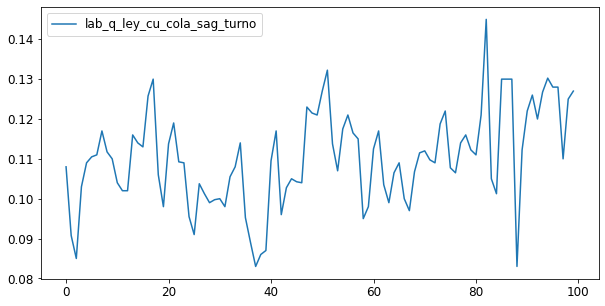

In [43]:
fsag_target.plot()

## Auxiliary

## Ingest data

In [10]:
print(context.io.__doc__)

``DataCatalog`` stores instances of ``AbstractDataSet`` implementations
    to provide ``load`` and ``save`` capabilities from anywhere in the
    program. To use a ``DataCatalog``, you need to instantiate it with
    a dictionary of data sets. Then it will act as a single point of reference
    for your calls, relaying load and save functions
    to the underlying data sets.
    


In [7]:
raw = context.io.load('data_det')

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/miniconda/envs/optimus/lib/python3.7/site-packages/kedro/framework/context/context.py:624: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/optimus/conf/base', '/optimus/conf/local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  str(exc)


2020-12-03 21:30:38,828 - kedro.io.data_catalog - INFO - Loading data from `data_det` (CSVDataSet)...


In [11]:
daf.Fecha.head()

0   2019-09-01 00:00:00
1   2019-09-01 00:10:00
2   2019-09-01 00:20:00
3   2019-09-01 00:30:00
4   2019-09-01 00:40:00
Name: Fecha, dtype: datetime64[ns]

In [47]:
daf = context.io.load('data_all_features')
daf.head()

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/miniconda/envs/optimus/lib/python3.7/site-packages/kedro/framework/context/context.py:624: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/optimus/conf/base', '/optimus/conf/local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  str(exc)


2020-12-04 00:55:58,978 - kedro.io.data_catalog - INFO - Loading data from `data_all_features` (PickleDataSet)...


,Fecha,cea_razon_agua_tms_colon,cea_razon_agua_tms_esc,cea_razon_agua_tms_gpta,cea_razon_agua_tms_mfres,cea_razon_agua_tms_munit,cea_razon_agua_tms_sag1,cea_razon_agua_tms_sag2,flo_310_fi43001,flo_310_fic43099_com,...,calc_m1_lag_calc_pot_esp_sag_2,calc_count_lab_q_ley_cu_cola_sag_turno,calc_count_calc_tph_sag1,calc_count_calc_tph_sag2,calc_p1_lag_lab_q_ley_cu_cola_sag_turno,calc_p1_lag_calc_tph_sag1,calc_p1_lag_calc_tph_sag2,calc_m1_lag_lab_q_ley_cu_cola_sag_turno,calc_m1_lag_calc_tph_sag1,calc_m1_lag_calc_tph_sag2
0,2019-09-01 05:00:00,2.314917,NaN,2.314917,NaN,1.319116,0.968773,0.000000,216.114225,-0.400000,...,NaN,4,4,4,0.10825,1552.093500,1216.91725,NaN,NaN,NaN
1,2019-09-01 09:00:00,2.314917,NaN,2.314917,NaN,1.347385,0.925069,0.633202,222.478175,-0.400000,...,NaN,4,4,4,0.11600,1546.260500,2605.15300,0.08500,1454.95250,0.00000
2,2019-09-01 13:00:00,2.314917,NaN,2.314917,NaN,1.364611,0.896844,1.219027,178.305250,-0.400000,...,0.142386,4,4,4,0.12500,1548.675250,2600.91600,0.10825,1552.09350,1216.91725
3,2019-09-01 17:00:00,2.124647,NaN,2.124647,NaN,1.405151,0.904093,1.229569,183.078825,-0.389966,...,0.143717,4,4,4,0.12800,942.568975,1556.86125,0.11600,1546.26050,2605.15300
4,2019-09-01 21:00:00,2.061224,NaN,2.061224,NaN,1.405699,1.443065,1.652792,181.035175,-0.360125,...,0.144556,4,4,4,0.11375,917.544675,2293.95750,0.12500,1548.67525,2600.91600


In [74]:
drc3 = context.io.load('data_cluster_0')
drc3.shape

2020-12-04 02:03:41,194 - kedro.io.data_catalog - INFO - Loading data from `data_cluster_0` (CSVDataSet)...


(659, 3182)

In [61]:
pd.merge(daf, drc3[['Timestamp','Cluster']].rename(index={'Timestamp':'Fecha'}), how='inner', left_on='Fecha', right_on='Timestamp').drop('Timestamp', axis=1).shape

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(138, 3016)

In [62]:
context.io.load('data_cluster_3')

(186, 3182)

In [84]:
context.io.load('sag1_cluster0.train_set').shape

2020-12-04 02:14:13,000 - kedro.io.data_catalog - INFO - Loading data from `sag1_cluster0.train_set` (CSVDataSet)...


(370, 3016)

In [86]:
context.io.load('sag1.train_set_feature_importance')

2020-12-04 02:22:06,898 - kedro.io.data_catalog - INFO - Loading data from `sag1.train_set_feature_importance` (PickleDataSet)...


sag_dit2189a              0.079606
sag_fic2188a              0.072871
sag_ji2182a               0.024694
sag_dit2189b              0.105876
sag_fic2188b              0.023531
sag_pi2208b               0.033250
sag_pi2208c               0.018762
sag_wi2102                0.029823
sag_fit2155               0.027392
sag_dit2152               0.042130
sag_dic2150z              0.033252
sag_split_cv461_fino      0.034965
sag_split_cv461_grueso    0.035165
sag_pebbles_s1            0.298113
sag_xe03                  0.056743
sag_xp01_02               0.030246
sag_xs04                  0.053580
dtype: float32

In [63]:
cluster_train = context.io.load('sag1_cluster3.train_set')
cluster_train.shape

/miniconda/envs/optimus/lib/python3.7/site-packages/kedro/framework/context/context.py:624: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/optimus/conf/base', '/optimus/conf/local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  str(exc)


2020-12-04 01:49:28,799 - kedro.io.data_catalog - INFO - Loading data from `sag1_cluster3.train_set` (CSVDataSet)...


(1962, 3015)

In [36]:
drc.Timestamp

0        2019-01-09 00:00:00
1        2019-01-09 00:10:00
2        2019-01-09 00:20:00
3        2019-01-09 00:30:00
4        2019-01-09 00:40:00
                ...         
57013    2020-09-30 23:10:00
57014    2020-09-30 23:20:00
57015    2020-09-30 23:30:00
57016    2020-09-30 23:40:00
57017    2020-09-30 23:50:00
Name: Timestamp, Length: 57018, dtype: object

In [26]:
drc.Timestamp = pd.to_datetime(drc.Timestamp, format='%Y-%m-%d %H:%M:%S')
drc_ = drc.copy()
drc_.rename(columns={'Timestamp':'Fecha'}, inplace=True)

In [37]:
drc_.columns

Index(['Fecha', 'CEA_Razon_Agua_tms_Colon', 'CEA_Razon_Agua_tms_ESC',
       'CEA_Razon_Agua_tms_gpta', 'CEA_Razon_Agua_tms_MFRES',
       'CEA_Razon_Agua_tms_MUNIT', 'CEA_Razon_Agua_tms_SAG1',
       'CEA_Razon_Agua_tms_SAG2', 'FLO:310_FI43001', 'FLO:310_FIC43099_COM',
       ...
       'SAG:WIC2101_SP', 'SAG:WIT2101_old', 'SAG:WIT2153', 'SAG:WIT_AL',
       'SAG:WQI2102X', 'SAG:WY2102', 'SAG:XE03', 'SAG:XP01_02', 'SAG:XS04',
       'Cluster'],
      dtype='object', length=3179)

In [29]:
drc_[['Fecha','Cluster']].set_index('Fecha').resample()

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cluster
Fecha,
2019-01-09 00:00:00,NaN
2019-01-09 00:10:00,NaN
2019-01-09 00:20:00,NaN
2019-01-09 00:30:00,NaN
2019-01-09 00:40:00,NaN
...,...
2020-09-30 23:10:00,0.0
2020-09-30 23:20:00,0.0
2020-09-30 23:30:00,0.0


In [19]:
td = context.io.load('td')

dic_master = pd.DataFrame(td.to_dict()).T.reset_index().rename(columns ={'index':'tag'})
dic_master[~dic_master.target.isna()]

uuid = context.io.load('sag.data_input_optim_uuid')

opt_func = context.io.load('sag.optimization_function')

dic_master[dic_master.tag_type=='control'].head(2)

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/miniconda/envs/optimus/lib/python3.7/site-packages/kedro/framework/context/context.py:624: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/optimus/conf/base', '/optimus/conf/local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  str(exc)


2020-12-02 15:22:40,001 - kedro.io.data_catalog - INFO - Loading data from `td` (PickleDataSet)...
2020-12-02 15:22:41,125 - kedro.io.data_catalog - INFO - Loading data from `sag.data_input_optim_uuid` (PickleDataSet)...
2020-12-02 15:22:42,152 - kedro.io.data_catalog - INFO - Loading data from `sag.optimization_function` (PickleDataSet)...


,tag,real_tag,server,description,name,unit,measurement_type,process,area,sub_area,...,dif_20%,dif_50%,dif_70%,dif_80%,dif_90%,dif_98%,dif_max,tag_type,op_min,op_max
12,fsag_320_lic_3206_com,FSAG:320_LIC_3206_COM,NaN,Banco 501 Arreglo 1 - Altura Espuma,NaN,cm,NaN,Flotacion,Flotation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control,5,40
13,fsag_320_lic_3207_com,FSAG:320_LIC_3207_COM,NaN,Banco 501 Arreglo 2 - Altura Espuma,NaN,cm,NaN,Flotacion,Flotation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control,5,40


In [18]:
uuid.head()

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,run_id,Fecha,cea_razon_agua_tms_colon,cea_razon_agua_tms_esc,cea_razon_agua_tms_gpta,cea_razon_agua_tms_mfres,cea_razon_agua_tms_munit,cea_razon_agua_tms_sag1,cea_razon_agua_tms_sag2,flo_310_fi43001,...,calc_m1_lag_calc_pot_esp_sag_2,calc_count_lab_q_ley_cu_cola_sag_turno,calc_count_calc_tph_sag1,calc_count_calc_tph_sag2,calc_p1_lag_lab_q_ley_cu_cola_sag_turno,calc_p1_lag_calc_tph_sag1,calc_p1_lag_calc_tph_sag2,calc_m1_lag_lab_q_ley_cu_cola_sag_turno,calc_m1_lag_calc_tph_sag1,calc_m1_lag_calc_tph_sag2
0,41b47b45-96c5-4c64-aaeb-82a74827a98f,2020-09-25 01:00:00,1.934003,0.0,1.934003,NaN,1.390270,0.878674,1.209935,15.549653,...,0.154135,4,4,4,0.12600,1253.344675,1899.230095,0.14500,1450.781750,2640.455750
1,00806925-9a13-4e18-b9c2-7938678ca046,2020-09-25 05:00:00,1.926829,0.0,1.926829,NaN,1.346854,1.033707,4.579122,18.672643,...,0.157450,4,4,4,0.12675,1494.068750,1972.248531,0.13075,1510.713250,2612.301500
2,6f8942a8-5e68-426c-9093-19b27640d811,2020-09-25 09:00:00,1.937589,0.0,1.937589,NaN,1.369581,0.910394,163.069314,15.539224,...,0.113039,4,4,4,0.12700,1408.949250,1941.796500,0.12600,1253.344675,1899.230095
3,13fe95f0-3f47-4c97-b3c2-f376f5b66160,2020-09-25 13:00:00,1.941176,0.0,1.941176,NaN,1.377826,0.926628,0.911301,6.550115,...,0.146768,4,4,4,0.10825,1198.462500,2649.219500,0.12675,1494.068750,1972.248531
4,f78cf02f-188e-456a-a35e-f4f992b9e4b0,2020-09-25 17:00:00,2.074866,0.0,2.074866,NaN,1.374872,1.084709,1.194060,18.623607,...,0.151367,4,4,4,0.10200,1540.510250,2586.461250,0.12700,1408.949250,1941.796500


In [1]:
recomm = context.io.load('sag.recommendations')
# recom_csv = context.io.load('sag.rep_optim_objective')

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/miniconda/envs/optimus/lib/python3.7/site-packages/kedro/framework/context/context.py:624: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/optimus/conf/base', '/optimus/conf/local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  str(exc)


2020-12-02 20:06:02,383 - kedro.io.data_catalog - INFO - Loading data from `sag.recommendations` (JSONDataSet)...


In [35]:
recomm.outputs.iloc[0]

{'target_calc_tph_sag_total_current': 4123.5930855674,
 'target_pred_current': 3900.103515625,
 'target_pred_optimized': 4231.7651367188}

In [9]:
df = context.io.load('data_all_features')

2020-11-27 19:15:25,460 - kedro.io.data_catalog - INFO - Loading data from `data_all_features` (PickleDataSet)...


In [10]:
df.head()

,Fecha,cea_razon_agua_tms_colon,cea_razon_agua_tms_esc,cea_razon_agua_tms_gpta,cea_razon_agua_tms_mfres,cea_razon_agua_tms_munit,cea_razon_agua_tms_sag1,cea_razon_agua_tms_sag2,flo_310_fi43001,flo_310_fic43099_com,...,calc_m1_lag_calc_pot_esp_sag_2,calc_count_lab_q_ley_cu_cola_sag_turno,calc_count_calc_tph_sag1,calc_count_calc_tph_sag2,calc_p1_lag_lab_q_ley_cu_cola_sag_turno,calc_p1_lag_calc_tph_sag1,calc_p1_lag_calc_tph_sag2,calc_m1_lag_lab_q_ley_cu_cola_sag_turno,calc_m1_lag_calc_tph_sag1,calc_m1_lag_calc_tph_sag2
0,2019-09-01 05:00:00,2.314917,NaN,2.314917,NaN,1.319116,0.968773,0.000000,216.114225,-0.400000,...,NaN,4,4,4,0.10825,1552.093500,1216.91725,NaN,NaN,NaN
1,2019-09-01 09:00:00,2.314917,NaN,2.314917,NaN,1.347385,0.925069,0.633202,222.478175,-0.400000,...,NaN,4,4,4,0.11600,1546.260500,2605.15300,0.08500,1454.95250,0.00000
2,2019-09-01 13:00:00,2.314917,NaN,2.314917,NaN,1.364611,0.896844,1.219027,178.305250,-0.400000,...,0.142386,4,4,4,0.12500,1548.675250,2600.91600,0.10825,1552.09350,1216.91725
3,2019-09-01 17:00:00,2.124647,NaN,2.124647,NaN,1.405151,0.904093,1.229569,183.078825,-0.389966,...,0.143717,4,4,4,0.12800,942.568975,1556.86125,0.11600,1546.26050,2605.15300
4,2019-09-01 21:00:00,2.061224,NaN,2.061224,NaN,1.405699,1.443065,1.652792,181.035175,-0.360125,...,0.144556,4,4,4,0.11375,917.544675,2293.95750,0.12500,1548.67525,2600.91600


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Columns: 3015 entries, Fecha to calc_m1_lag_calc_tph_sag2
dtypes: datetime64[ns](1), float64(3011), int64(3)
memory usage: 54.6 MB


/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# df["timestamp"] = pd.to_datetime(df.Fecha, format="%Y-%m-%d %H:%M:%S")
# df["timestamp"] = df.Fecha
df.set_index("Fecha", inplace=True)


In [15]:
df_clean=df.dropna(axis=1,how='all')
columns_clean=df_clean.columns
columns_all=df.columns
dropped_columns=set(columns_all)-set(columns_clean)
pd.DataFrame(dropped_columns).to_csv('columnas_sin_dato.csv')

In [16]:
tag_dict=pd.read_excel('variables_analisis.xlsx')

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: [Errno 2] No such file or directory: 'variables_analisis.xlsx'

In [10]:
tags=tag_dict[tag_dict.AnalisisMA2==1].real_tag
tags_clean=set(tags).intersection(columns_clean)
df_ma2=df_clean[tags_clean]

NameError: name 'df_ma2' is not defined

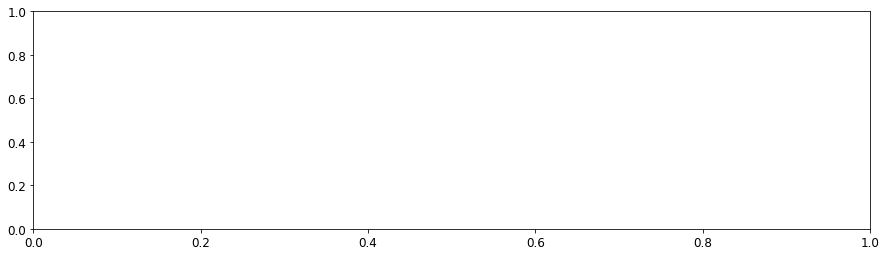

In [17]:
import matplotlib.dates as mdates
pilas=[
    'MA2:FINO16',
    'MA2:FINO17',
    'CV_04A.Fino']

fig, ax1 = plt.subplots(figsize=(15,4))
df1=df_ma2[pilas]
inicio='2020-09-24'
fin='2020-10-05'
ax1.plot(df1.loc[inicio:fin])
ax1.legend(df1.columns,loc='best')
ax1.set_title('Finos Pre y post Pila A2', fontsize=20)
myFmt = mdates.DateFormatter('%d-%b')
ax1.xaxis.set_major_formatter(myFmt)
#ax1.set_ylim(30,70)\
plt.savefig('finos_a2.png')

In [18]:
df_clean['CH1:WIT_04A'].loc['2019':'2020-04-29 19:00'].describe()['max']/df_clean['CH1:WIT_04A'].loc['2020-04-29 19:00':].describe()['max']

6.182119381296138

In [19]:
df_clean['CH1:WIT_22CV3'].loc['2019':'2020-04-29 19:00'].describe()['max']/df_clean['CH1:WIT_22CV3'].loc['2020-04-29 19:00':].describe()['max']

8.22819017829646

In [20]:
df_clean[['CH1:WIT_04A','CH1:WIT_22CV3']].resample('1M').max()

,CH1:WIT_04A,CH1:WIT_22CV3
Fecha,,
2019-01-31,39461.651570,37437.810690
2019-02-28,34756.295490,37636.648110
2019-03-31,36313.158900,38490.805900
2019-04-30,34454.189190,40024.577030
2019-05-31,35234.364320,40784.803180
2019-06-30,40168.153330,43094.080630
2019-07-31,39551.464690,37869.567190
2019-08-31,33899.625780,40842.624320
2019-09-30,37630.850580,38421.062000


In [11]:
df_clean['04A']=df_clean['CH1:WIT_04A'].copy()
df_clean['22CV3']=df_clean['CH1:WIT_22CV3'].copy()
df_clean['04A'].loc['2019':'2020-04-28 19:00']=df_clean['04A'].loc['2019':'2020-04-28 19:00']/6.18
df_clean['22CV3'].loc['2019':'2020-04-28 19:00']=df_clean['22CV3'].loc['2019':'2020-04-28 19:00']/8.22

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

<AxesSubplot:xlabel='Fecha'>

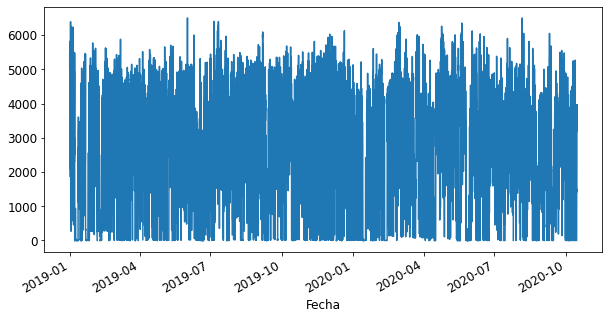

In [22]:
df_clean['04A'].plot()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

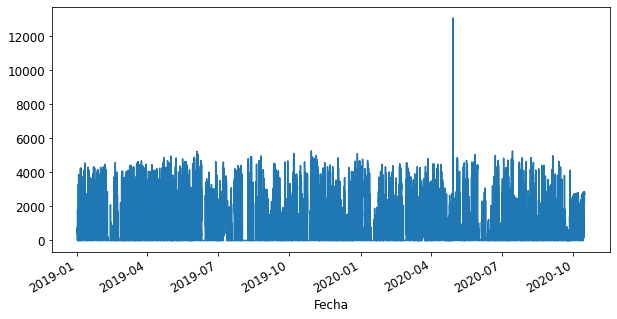

In [55]:
df_clean['22CV3'].plot()

In [12]:
df_clean=df_clean.resample('8H').mean()

df_clean['06A']=df_clean['CH1:CT05A_STATUS_CALC']*df_clean['CH1:WIT_CORR2A']


df_clean['06A_rajo']=df_clean['CH1:CT05A_STATUS_CALC']*df_clean['22CV3']
df_clean['06A_subte']=df_clean['06A']-df_clean['06A_rajo']

df_clean['CH1_SRT:WIT_208.OUT_PV'] = df_clean['CH1_SRT:WIT_208.OUT_PV'].fillna(0)

df_clean['04A_rt']=df_clean['CH1_SRT:WIT_208.OUT_PV']
df_clean['04A_rajo']=df_clean['04A']-df_clean['04A_rt']

df_clean['s16']=df_clean['MA2:3WIC110']-df_clean['MA2:3WI104']
df_clean['s17']=df_clean['MA2:3WIC210']-df_clean['MA2:3WI103']

df_clean['salidas']=df_clean[['s16','s17']].sum(axis=1)
df_clean['entradas']=df_clean[['04A','06A']].sum(axis=1)


df_clean['a2_rajo']=df_clean['04A_rajo']+df_clean['06A_rajo'].shift(2)
df_clean['a2_rt']=df_clean['04A_rt']
df_clean['a2_subte']=df_clean['06A_subte'].shift(2)
    
df_clean[['06A','04A','s16','s17','entradas','salidas', '06A_rajo', '06A_subte', '04A_rt', '04A_rajo', 'a2_rajo','a2_rt','a2_subte']].loc['2020-05':].describe()

,06A,04A,s16,s17,entradas,salidas,06A_rajo,06A_subte,04A_rt,04A_rajo,a2_rajo,a2_rt,a2_subte
count,492.000000,500.000000,503.000000,503.000000,503.000000,503.000000,503.000000,492.000000,503.000000,500.000000,500.000000,503.000000,492.000000
mean,961.645657,2724.660727,2125.331404,1832.524313,3649.025898,3957.855717,442.046133,511.788628,315.228215,2407.541143,2844.409982,315.228215,511.724189
std,1006.022966,1253.585595,923.081099,667.165273,1097.787660,1090.336281,695.914806,760.474786,513.151551,1235.385577,1171.775980,513.151551,760.342345
min,0.000000,0.069320,-0.069280,0.000000,3.288018,0.000000,0.000000,-2092.098129,0.000000,-967.335424,-718.324341,0.000000,-2092.098129
25%,12.983263,2014.803777,1892.262141,1562.733588,2965.297346,3201.896565,0.000000,0.000000,0.000000,1720.927180,2147.028908,0.000000,0.000000
50%,658.429155,3013.944380,2381.278431,1968.510498,3748.598252,4154.658299,86.593804,292.838126,0.000000,2720.057925,2992.381788,0.000000,287.669457
75%,1610.184862,3634.554562,2801.089328,2268.716514,4379.724916,4818.501857,576.576382,936.264258,658.863153,3355.256693,3611.359472,658.863153,936.264258
max,4146.857658,5259.666038,3179.786075,3037.857794,6592.816192,5883.291799,3480.784622,3157.797461,2818.619505,4582.014985,7370.424479,2818.619505,3157.797461


In [13]:
proporciones=[
    'a2_rajo',
    'a2_rt', 
    'a2_subte'
    
]

df_clean[df_clean<0]=0

df_clean['suma_a2']=df_clean[proporciones].sum(axis=1)

df_clean['a2_rajo_norm']=df_clean['a2_rajo']/df_clean['suma_a2']
df_clean['a2_rt_norm']=df_clean['a2_rt']/df_clean['suma_a2']
df_clean['a2_subte_norm']=df_clean['a2_subte']/df_clean['suma_a2']



df_clean[proporciones].describe()

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,a2_rajo,a2_rt,a2_subte
count,1931.000000,1961.000000,1940.000000
mean,3064.452276,198.553441,254.653682
std,1251.405715,429.951483,498.108494
min,0.000000,0.000000,0.000000
25%,2349.014129,0.000000,0.000000
50%,3238.180472,1.682602,0.000000
75%,3854.185574,9.697718,271.248019
max,7762.596024,2818.619505,3254.525928


/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Fecha'>

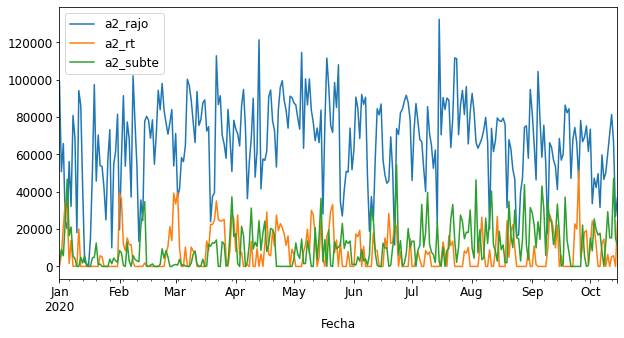

In [62]:
(df_clean[proporciones].loc['2020':]*8).resample('24H').sum().plot()

Text(0.5, 1.0, 'Señal Alimentación A2')

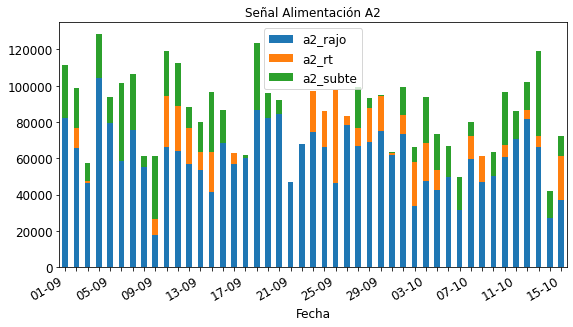

In [93]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

df_plot=(df_clean[proporciones].loc['2020-09':]*8).resample('24H').sum()

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)


df_plot.plot(kind='bar', stacked=True,ax=ax1)
        #ax1.set_ylim(target_min,target_max)
        #ax1.set_xlabel('jjjs')
ticklabels = ['']*len(df_plot.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item.strftime('%d-%m') for item in df_plot.index[::4]]
# Every 12th ticklabel includes the year
#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_plot.index[::12]]
ax1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()


ax1.set_title('Señal Alimentación A2')

Text(0, 0.5, '% de aporte')

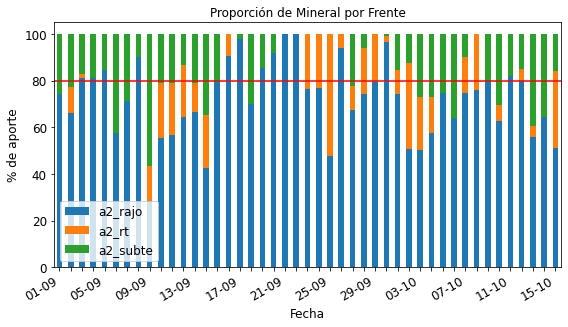

In [98]:
import matplotlib.dates as mdates


fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)

tags=['subte', 'rajo','rt']
stacked_data = df_plot.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,ax=ax1)

ax1.axhline(y=80, color='r')

ticklabels = ['']*len(df_plot.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item.strftime('%d-%m') for item in df_plot.index[::4]]
# Every 12th ticklabel includes the year
#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_plot.index[::12]]
ax1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()


plt.title("Proporción de Mineral por Frente")
plt.xlabel("Fecha")
plt.ylabel("% de aporte")

Text(0.5, 1.0, 'Señal Alimentación Concentradora')

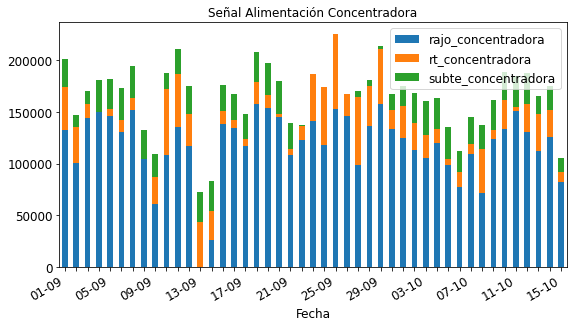

In [105]:
df_clean['rajo_concentradora']=df_clean['CH1:WIT_MTS1']+df_clean['CH1:WIT_MTS2']
df_clean['rt_concentradora']=df_clean['CH1_SRT:WIT_CTR_002']
df_clean['subte_concentradora']=df_clean['63433-WI-001_Inst']

proporciones=['rajo_concentradora','rt_concentradora','subte_concentradora']

df_plot=(df_clean[proporciones].loc['2020-09':]*8).resample('24H').sum()

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)


df_plot.plot(kind='bar', stacked=True,ax=ax1)
        #ax1.set_ylim(target_min,target_max)
        #ax1.set_xlabel('jjjs')
ticklabels = ['']*len(df_plot.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item.strftime('%d-%m') for item in df_plot.index[::4]]
# Every 12th ticklabel includes the year
#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_plot.index[::12]]
ax1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()


ax1.set_title('Señal Alimentación Concentradora')


Text(0, 0.5, '% de aporte')

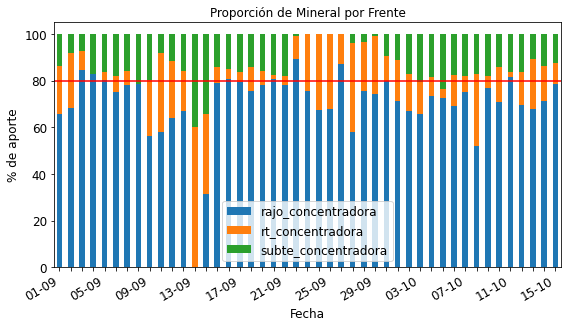

In [104]:

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)

tags=['rajo_concentradora','subte_concentradora','rt_concentradora']
stacked_data = df_plot.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,ax=ax1)

ax1.axhline(y=80, color='r')

ticklabels = ['']*len(df_plot.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item.strftime('%d-%m') for item in df_plot.index[::4]]
# Every 12th ticklabel includes the year
#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_plot.index[::12]]
ax1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()


plt.title("Proporción de Mineral por Frente")
plt.xlabel("Fecha")
plt.ylabel("% de aporte")

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Fecha'>

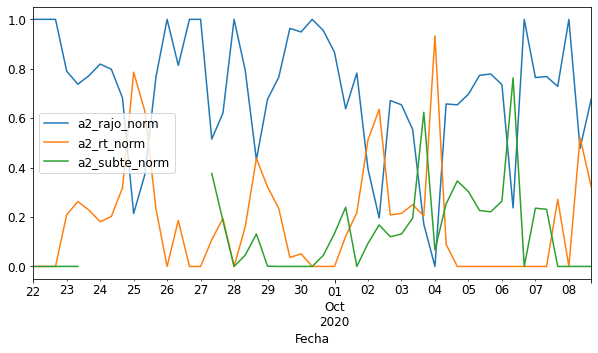

In [57]:
proporciones_norm=[
    'a2_rajo_norm',
    'a2_rt_norm',
    'a2_subte_norm'

]

df_clean['finos_sag']=(df_clean['MA2:FINO16']*df_clean['s16']+df_clean['MA2:FINO17']*df_clean['s17'])/(df_clean['s16']+df_clean['s17'])


df_clean['potencias']=df_clean[['MA2:3JI155','MA2:3JI255']].sum(axis=1)

df_clean['CEE']=df_clean['potencias']/df_clean['salidas']


df_clean[proporciones_norm].loc['2020-09-22':'2020-10-08'].plot()


In [80]:
df_clean[proporciones_norm].loc['2020-08':].describe()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,a2_rajo_norm,a2_rt_norm,a2_subte_norm
count,226.000000,227.000000,216.000000
mean,0.739254,0.094015,0.178645
std,0.234710,0.173874,0.192162
min,0.000000,0.000000,0.000000
25%,0.602145,0.000000,0.000000
50%,0.773425,0.000000,0.131423
75%,0.963244,0.174416,0.282168
max,1.000000,0.967591,1.000000


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

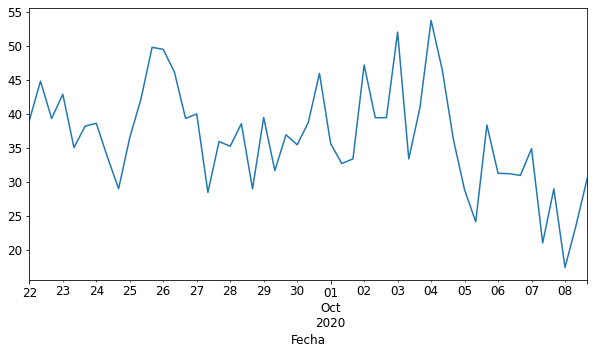

In [147]:
df_clean['finos_sag'].loc['2020-09-22':'2020-10-08'].plot()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

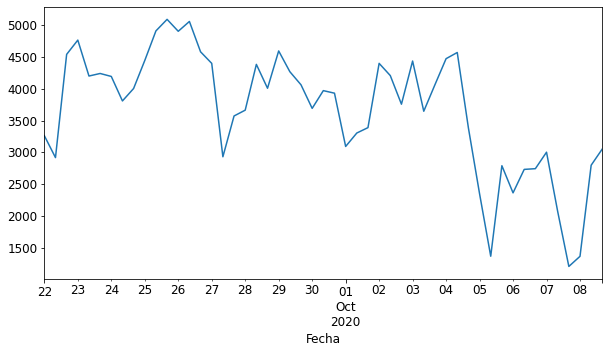

In [148]:
df_clean['salidas'].loc['2020-09-22':'2020-10-08'].plot()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

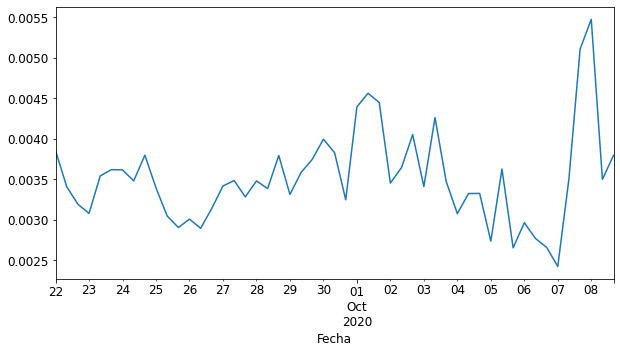

In [150]:
df_clean['CEE'].loc['2020-09-22':'2020-10-08'].plot()

<AxesSubplot:xlabel='Fecha'>

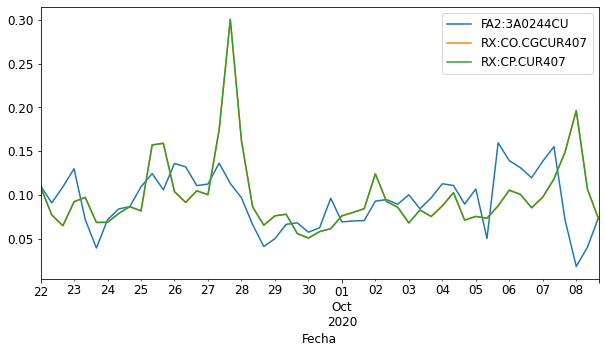

In [153]:
colas=[
    'FA2:3A0244CU',
    'RX:CO.CGCUR407',
    'RX:CP.CUR407']
#     
    
df_clean[colas].loc['2020-09-22':'2020-10-08'].plot()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

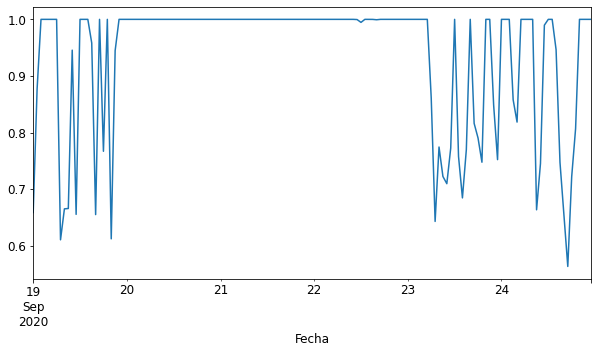

In [101]:
df_clean['a2_rajo_norm'].loc['2020-09-19':'2020-09-24'].plot()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

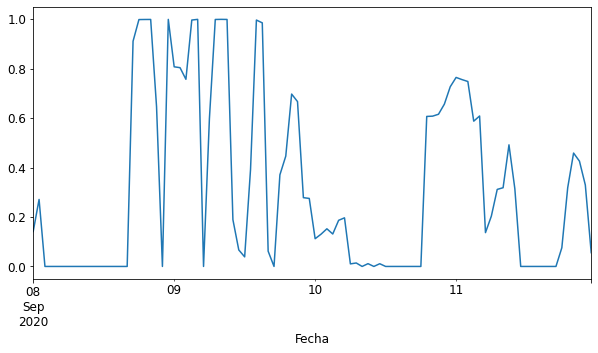

In [91]:
df_clean['a2_subte_norm'].loc['2020-09-08':'2020-09-11'].plot()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

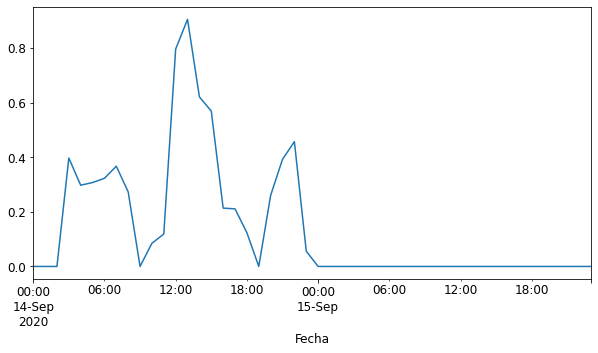

In [97]:
df_clean['a2_rt_norm'].loc['2020-09-14':'2020-09-15'].plot()

In [19]:
df_clean['finos_sag']=(df_clean['MA2:FINO16']*df_clean['s16']+df_clean['MA2:FINO17']*df_clean['s17'])/(df_clean['s16']+df_clean['s17'])

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

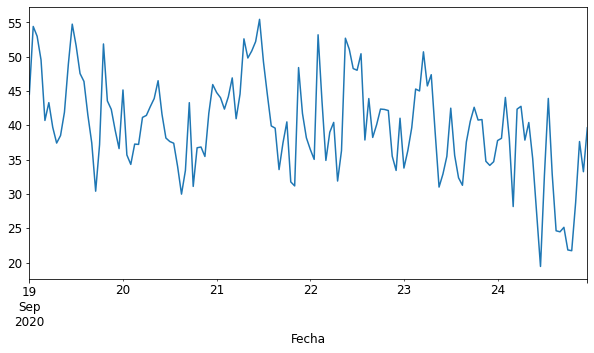

In [102]:
df_clean['finos_sag'].loc['2020-09-19':'2020-09-24'].plot()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

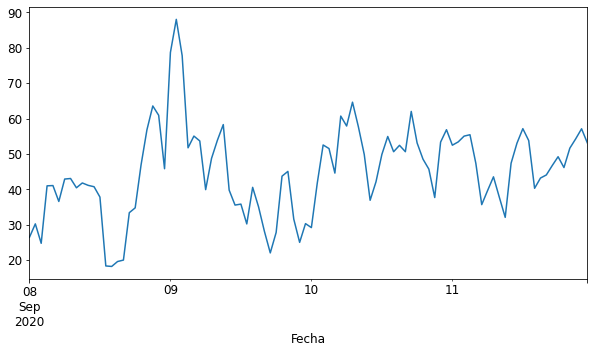

In [100]:
df_clean['finos_sag'].loc['2020-09-08':'2020-09-11'].plot()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

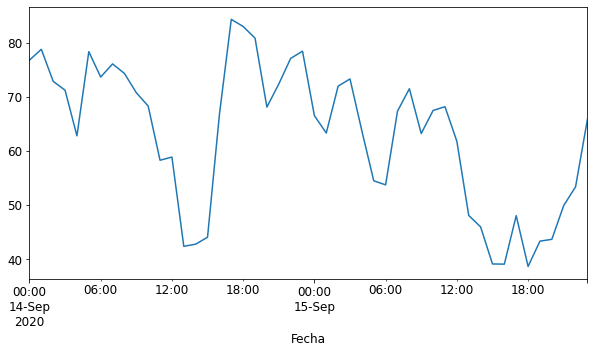

In [107]:
df_clean['finos_sag'].loc['2020-09-14':'2020-09-15'].plot()

#.plot(secondary_axis=True)

In [39]:
def func_rajo(x):
    if x < .6:
        return '01: de 0 a 60%'
    elif x < .9:
        return '02: de 60 a 90%'
    elif x >= .9:
        return '03: > 90%'
    return '04: Sin asignar'


def func_rt(x):
    if x < .05:
        return '01: de 0 a 5%'
    elif x < .25:
        return '02: de 5 a 25%'
    elif x < .5:
        return '03: de 25 a 50%'
    elif x >= .5:
        return '04: > 50%'
    return '05: Sin asignar'

def func_subte(x):
    if x < .05:
        return '01: de 0 a 5%'
    elif x < .25:
        return '02: de 5 a 25%'
    elif x < .5:
        return '03: de 15 a 50%'
    elif x >= .5:
        return '04: > 50%'
    return '05: Sin asignar'


/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
#df_clean[tags].loc['2020':].describe(percentiles=[.02,.05,.1,.2,.4,.6,.8,.9,.95,.98])

df_clean['Tramo Rajo']=df_clean['a2_rajo_norm'].apply(func_rajo)
df_clean['Tramo Subte']=df_clean['a2_subte_norm'].apply(func_subte)
df_clean['Tramo RT']=df_clean['a2_rt_norm'].apply(func_rt)

df_clean['rec_simple']=1-df_clean['RX:CO.CGCUR407']/df_clean['RX:CO.A2.CUR403']

df_clean['rec_simple'][df_clean['rec_simple']<.6]=np.nan

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Fecha'>

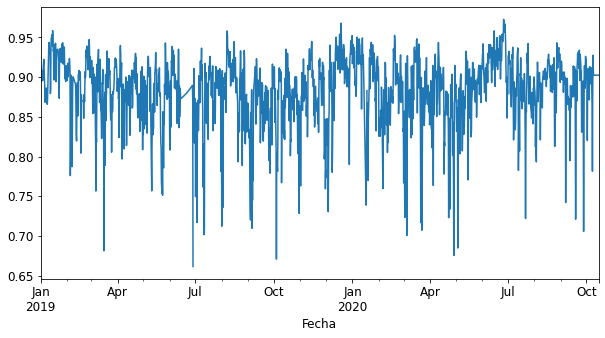

In [17]:
#df_clean['RX:CO.CGCUR407'].plot()
#RX:AP.CUR103
#df_clean['RX:CO.A2.CUR403'].plot()
df_clean['rec_simple'].plot()

In [31]:
set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar'])

{'01: de 0 a 5%', '02: de 5 a 25%', '03: de 25 a 50%', '04: > 50%'}

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


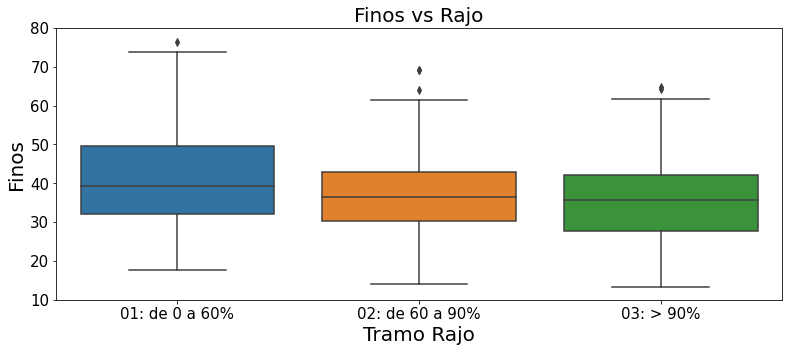

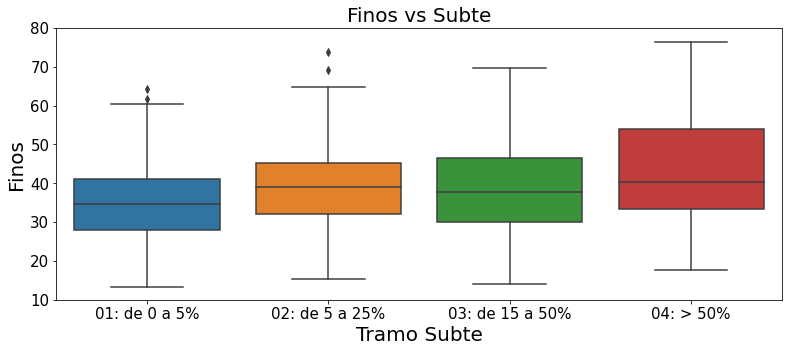

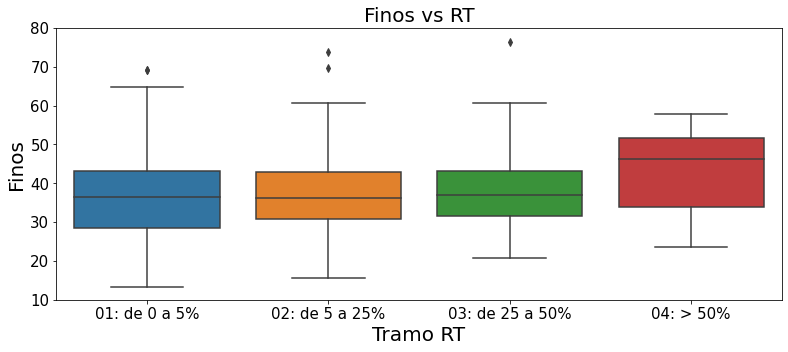

In [46]:
df_graph=df_clean.loc['2020':]
df_graph=df_graph[df_graph['entradas']>2000]

plt.figure(figsize=(13,5))
order3=sorted(df_graph['Tramo Rajo'].unique())
order3=sorted(set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar']))
ax = sns.boxplot(x="Tramo Rajo", y='finos_sag', data=df_graph,order=order3)
ax.axes.set_title("Finos vs Rajo",fontsize=20)
ax.set_xlabel("Tramo Rajo",fontsize=20)
ax.set_ylabel("Finos",fontsize=20)
ax.set_ylim(10,80)
ax.tick_params(labelsize=15)


plt.figure(figsize=(13,5))
order3=sorted(df_graph['Tramo Subte'].unique())
order3=sorted(set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar']))
ax = sns.boxplot(x="Tramo Subte", y='finos_sag', data=df_graph,order=order3)
ax.axes.set_title("Finos vs Subte",fontsize=20)
ax.set_xlabel("Tramo Subte",fontsize=20)
ax.set_ylabel("Finos",fontsize=20)
ax.set_ylim(10,80)
ax.tick_params(labelsize=15)


plt.figure(figsize=(13,5))
order3=sorted(df_graph['Tramo RT'].unique())
order3=sorted(set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar']))
ax = sns.boxplot(x="Tramo RT", y='finos_sag', data=df_graph,order=order3)
ax.axes.set_title("Finos vs RT",fontsize=20)
ax.set_xlabel("Tramo RT",fontsize=20)
ax.set_ylabel("Finos",fontsize=20)
ax.set_ylim(10,80)
ax.tick_params(labelsize=15)


/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


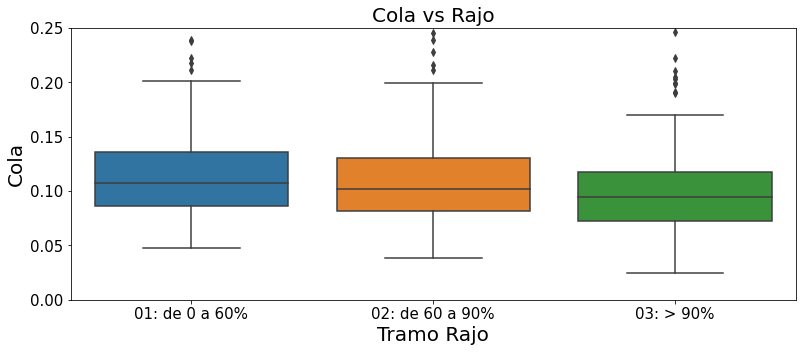

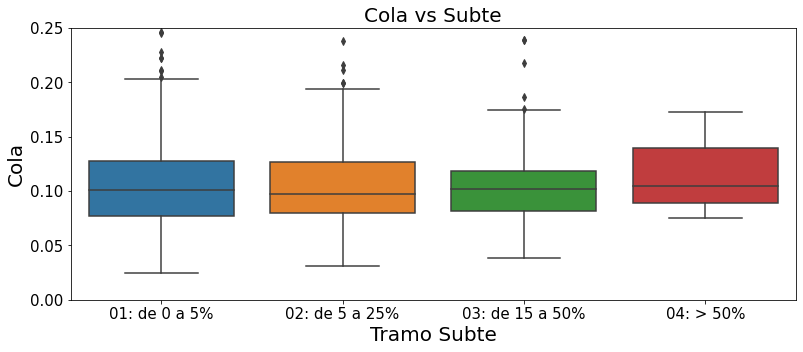

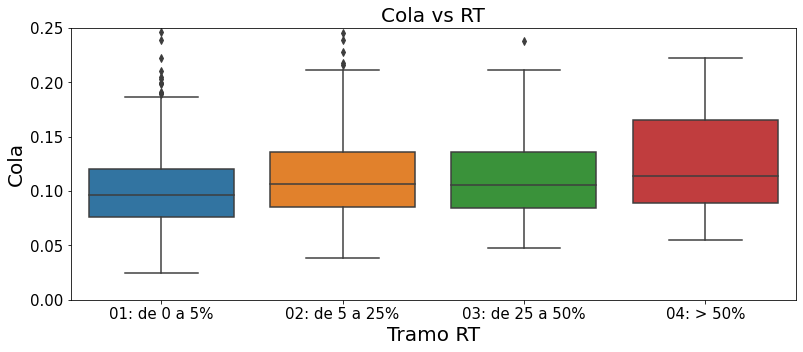

In [49]:
plt.figure(figsize=(13,5))
order3=sorted(df_graph['Tramo Rajo'].unique())
order3=sorted(set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar']))
ax = sns.boxplot(x="Tramo Rajo", y='RX:CO.CGCUR407', data=df_graph,order=order3)
ax.axes.set_title("Cola vs Rajo",fontsize=20)
ax.set_xlabel("Tramo Rajo",fontsize=20)
ax.set_ylabel("Cola",fontsize=20)
ax.set_ylim(0,.25)
ax.tick_params(labelsize=15)


plt.figure(figsize=(13,5))
order3=sorted(df_graph['Tramo Subte'].unique())
order3=sorted(set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar']))
ax = sns.boxplot(x="Tramo Subte", y='RX:CO.CGCUR407', data=df_graph,order=order3)
ax.axes.set_title("Cola vs Subte",fontsize=20)
ax.set_xlabel("Tramo Subte",fontsize=20)
ax.set_ylabel("Cola",fontsize=20)
ax.set_ylim(0,.25)
ax.tick_params(labelsize=15)


plt.figure(figsize=(13,5))
order3=sorted(df_graph['Tramo RT'].unique())
order3=sorted(set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar']))
ax = sns.boxplot(x="Tramo RT", y='RX:CO.CGCUR407', data=df_graph,order=order3)
ax.axes.set_title("Cola vs RT",fontsize=20)
ax.set_xlabel("Tramo RT",fontsize=20)
ax.set_ylabel("Cola",fontsize=20)
ax.set_ylim(0,.25)
ax.tick_params(labelsize=15)


/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


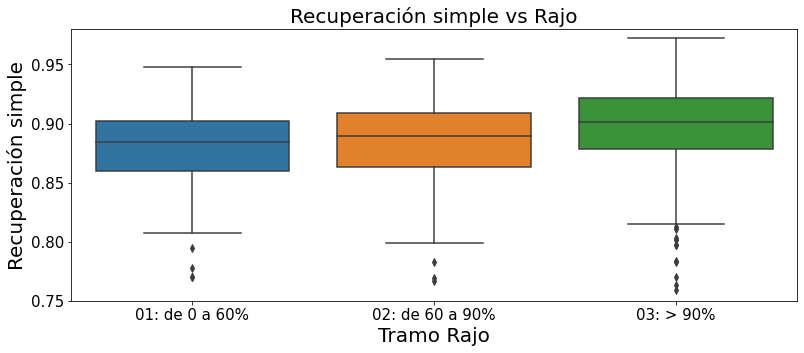

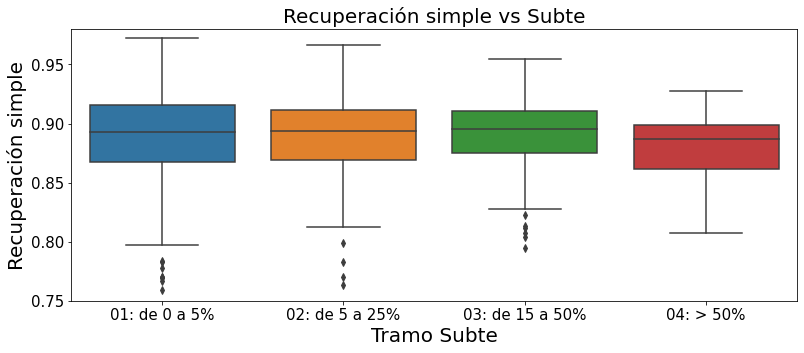

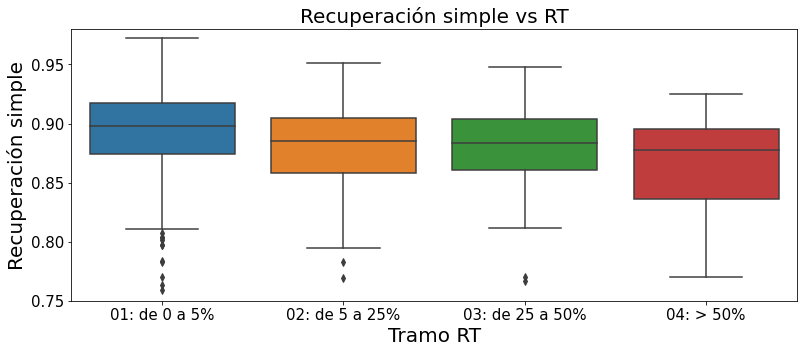

In [54]:
plt.figure(figsize=(13,5))
order3=sorted(df_graph['Tramo Rajo'].unique())
order3=sorted(set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar']))
ax = sns.boxplot(x="Tramo Rajo", y='rec_simple', data=df_graph,order=order3)
ax.axes.set_title("Recuperación simple vs Rajo",fontsize=20)
ax.set_xlabel("Tramo Rajo",fontsize=20)
ax.set_ylabel("Recuperación simple",fontsize=20)
ax.set_ylim(.75,.98)
ax.tick_params(labelsize=15)


plt.figure(figsize=(13,5))
order3=sorted(df_graph['Tramo Subte'].unique())
order3=sorted(set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar']))
ax = sns.boxplot(x="Tramo Subte", y='rec_simple', data=df_graph,order=order3)
ax.axes.set_title("Recuperación simple vs Subte",fontsize=20)
ax.set_xlabel("Tramo Subte",fontsize=20)
ax.set_ylabel("Recuperación simple",fontsize=20)
ax.set_ylim(.75,.98)
ax.tick_params(labelsize=15)


plt.figure(figsize=(13,5))
order3=sorted(df_graph['Tramo RT'].unique())
order3=sorted(set(order3)-set(order3).intersection(['05: Sin asignar','04: Sin asignar']))
ax = sns.boxplot(x="Tramo RT", y='rec_simple', data=df_graph,order=order3)
ax.axes.set_title("Recuperación simple vs RT",fontsize=20)
ax.set_xlabel("Tramo RT",fontsize=20)
ax.set_ylabel("Recuperación simple",fontsize=20)
ax.set_ylim(.75,.98)
ax.tick_params(labelsize=15)


array([[<AxesSubplot:title={'center':'a2_rajo_norm'}>,
        <AxesSubplot:title={'center':'a2_rt_norm'}>],
       [<AxesSubplot:title={'center':'a2_subte_norm'}>, <AxesSubplot:>]],
      dtype=object)

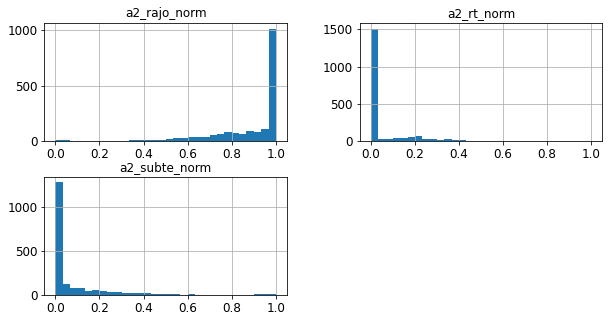

In [32]:
tags=['a2_rajo_norm','a2_rt_norm','a2_subte_norm']
df_clean[tags].hist(bins=30)

In [86]:
df_graph.to_csv('analisis_v3_shift.csv')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

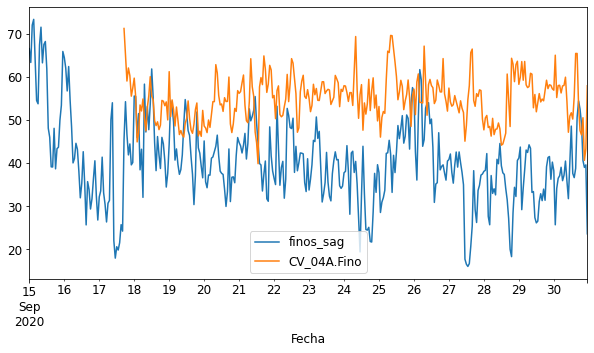

In [19]:
df_clean[['finos_sag','CV_04A.Fino']].loc['2020-09-15':'2020-09'].plot()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

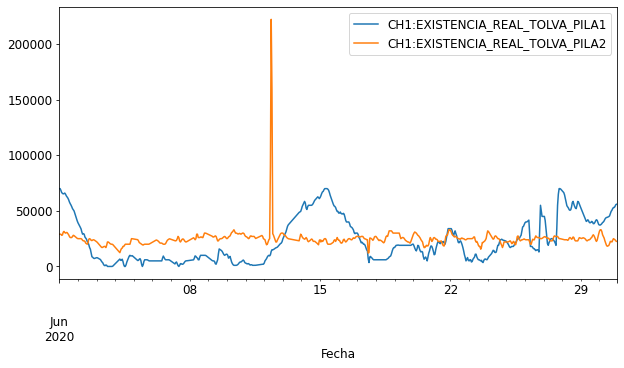

In [20]:
pilas=[
    'CH1:LIT286',
    'CH1:LITSONICOPL2W'
    #'CH1_SRT:LIT_286.OUT_PV'
    ]
tolvas=[
    'CH1:EXISTENCIA_REAL_TOLVA_PILA1',
    'CH1:EXISTENCIA_REAL_TOLVA_PILA2',
    ]

df_clean[tolvas].loc['2020-06'].plot()

In [24]:
dispatch=pd.read_csv('DCH_dispatch_2019_2020.csv',index_col=1)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [25]:
dispatch

,division,total_tonelaje,tronadura,descarga,cu_%,conc_%,as,mo,fe,zn,rec,pb,spi
tiempo_vacio,,,,,,,,,,,,,
2019-01-01 08:00:00,DCH,442.0,Stock 57,E4-2,0.580,24.000,0.012,0.036,1.420,0.0,86.300,0.000,3.500
2019-01-01 08:00:00,DCH,780.0,Poligonos,E4-1,0.687,25.366,0.005,0.026,1.304,0.0,85.099,0.000,1.800
2019-01-01 08:00:00,DCH,1040.0,Poligonos,E4-2,0.690,25.850,0.006,0.020,1.406,0.0,85.450,0.000,1.350
2019-01-01 08:00:00,DCH,1326.0,Stock 57,E4-1,0.582,24.000,0.012,0.036,1.422,0.0,86.298,0.000,3.498
2019-01-01 08:00:00,DCH,1326.0,Stock Otros,E4-1,0.672,26.700,0.006,0.024,1.410,0.0,86.100,0.006,3.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-16 09:00:00,DCH,3808.0,Poligonos,Stock,0.996,30.274,0.050,0.070,2.199,0.0,90.779,0.005,4.063
2020-10-16 10:00:00,DCH,213.0,Stock 57,E4-1,0.460,21.600,0.006,0.020,1.500,0.0,82.500,0.008,3.100
2020-10-16 10:00:00,DCH,272.0,Poligonos,E4-1,0.900,31.100,0.003,0.003,1.130,0.0,90.100,0.000,3.600


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='Fecha'>

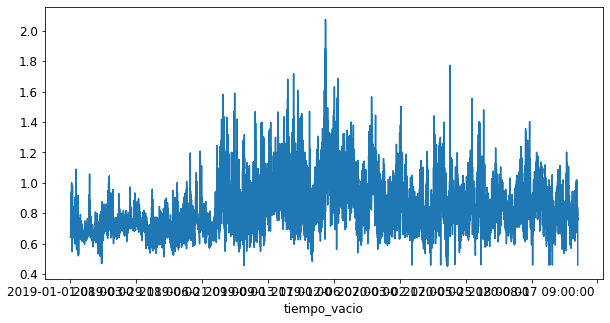

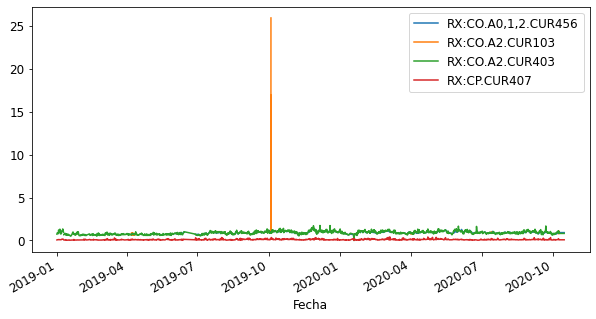

In [26]:
dispatch[(dispatch.descarga=='E4-1') | (dispatch.descarga=='E4-2')].groupby('tiempo_vacio')['cu_%'].mean().plot()


tags_ley=[
'RX:CO.A0,1,2.CUR456',
'RX:CO.A2.CUR103',
'RX:CO.A2.CUR403',
'RX:CP.CUR407'   
]

df_clean[tags_ley].plot()

In [31]:
ejemplo=dispatch[(dispatch.descarga=='E4-1') | (dispatch.descarga=='E4-2')].groupby('tiempo_vacio')['cu_%','spi','as','fe','mo','rec'].mean()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [32]:
ejemplo.describe()

,cu_%,spi,as,fe,mo,rec
count,15402.000000,15402.000000,15402.000000,15402.000000,15402.000000,15402.000000
mean,0.832758,2.970813,0.028262,1.640764,0.038676,86.355606
std,0.167522,0.580023,0.020854,0.510202,0.015065,3.620041
min,0.450500,0.000000,0.000000,0.228000,0.000000,0.000000
25%,0.709617,2.731000,0.013750,1.260250,0.028500,85.636750
50%,0.794917,3.051800,0.024000,1.574417,0.036000,86.639833
75%,0.925000,3.320000,0.038000,1.914333,0.047000,87.679688
max,2.075000,4.900000,0.311500,4.677500,0.213500,93.061500


In [29]:
analisis_visual=ejemplo.merge(df_clean[tags_ley], left_index=True, right_index=True)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:>

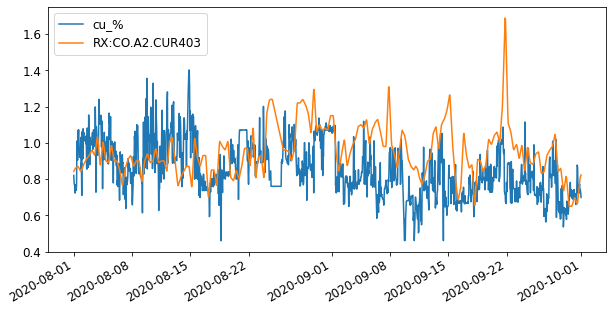

In [30]:
analisis_visual[['cu_%','RX:CO.A2.CUR403']].loc['2020-08':'2020-09'].plot()#,'spi',

#PILOTO: SOLO AVISAR QUÉ VIENE BRIGIDO, CAMBIO DE ESTANDAR EN FLOTACIÓN!

In [24]:
chuqui=['ch1_wit_mts1','ch1_wit_mts2']
rt=['ch1_srt_wit_208_out_pv','ch1_srt_wit_270_out_pv']
subte=['63433_wi_001_inst']

df['subte']=df[subte]
df['rajo']=df[chuqui].sum(axis=1)
df['rt']=df[rt].sum(axis=1)

KeyError: "None of [Index(['63433_wi_001_inst'], dtype='object')] are in the [columns]"

Text(0, 0.5, '% de aporte')

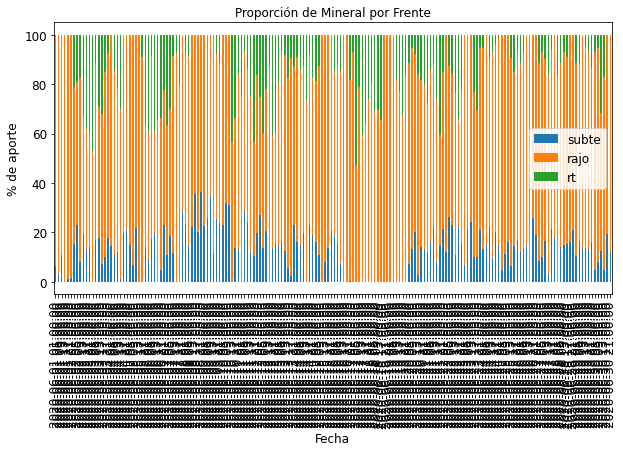

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='timestamp'>

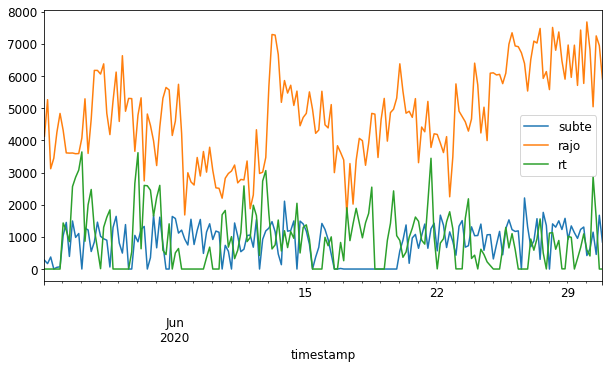

In [14]:
df[tags].loc['2020-06'].plot()

ma2_3wic210
ma0_2wic14a
ma0_2wic14c
ma0_2wic14d
ma0_2wic14m
fa0_4a0301cu
fa0_4a0305cu
fa0_4a0309cu
fa0_4a0310cu
fa1_7a0103cu
fa1_7a0107cu
fa1_7a0121cu
fa1_7a0122cu
fa2_3a0204cu
fa2_3a0208cu
fa2_3a0223cu
fa2_3a0224cu
fa2_3a0225cu
fa2_3a0244cu


invalid value encountered in double_scalars
divide by zero encountered in double_scalars
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


rx_ccp_cur409_rx
ch1_srt_wit_208_out_pv
ch1_wit_22cv2
ch1_wit_22cv3
ch23_wit_134a
ch23_wit_134c
ch23_fit_136a_m
ch23_fit_136b_m
ch1_srt_wit_270_out_pv
ch1_wit_corr2a
ch1_wit_04a
ma2_lims_ley_cus_alim_fp_t
63433_wi_001_inst


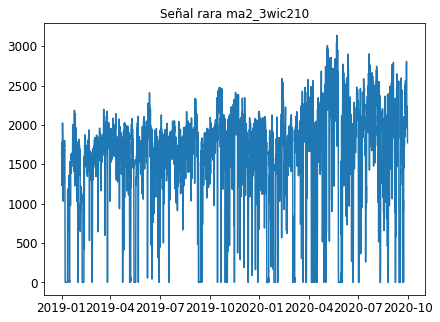

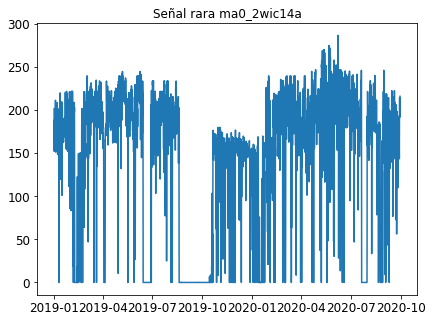

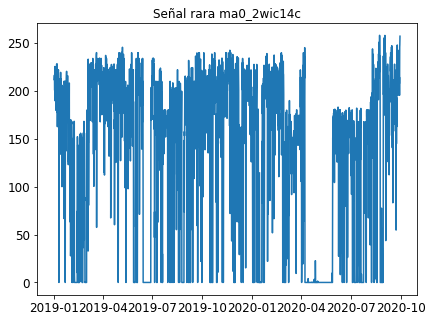

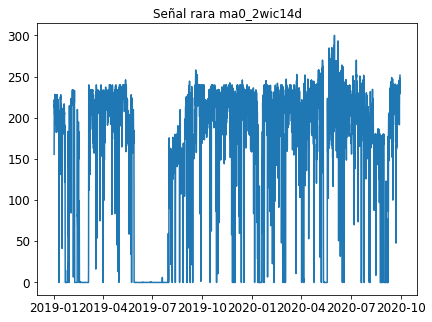

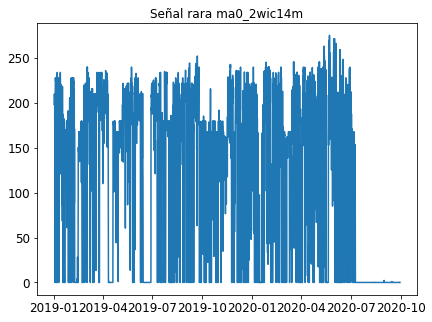

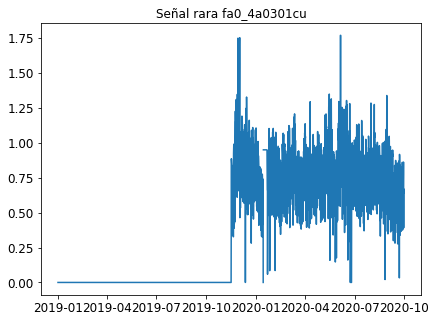

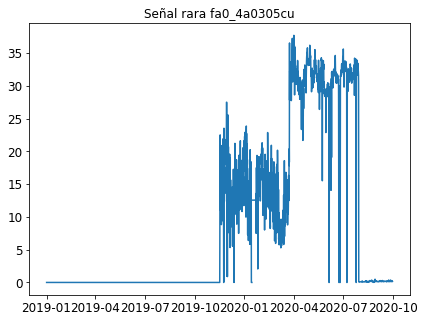

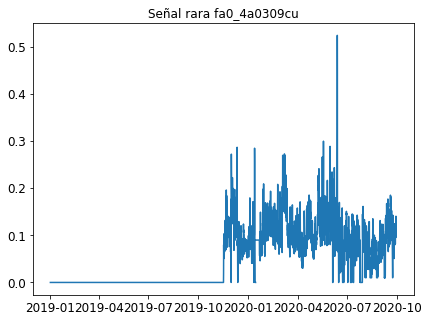

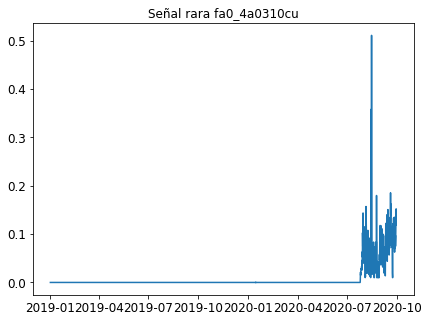

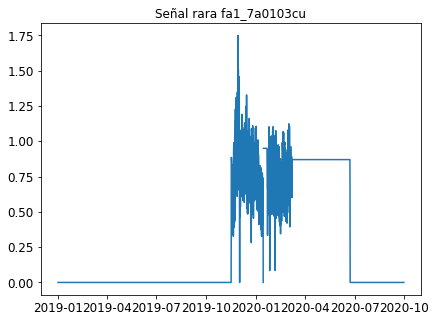

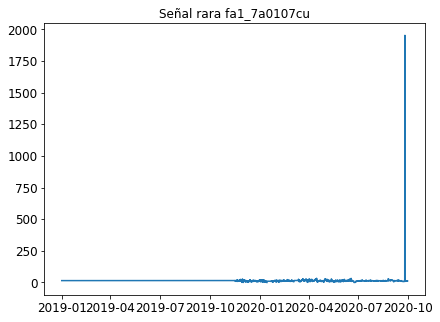

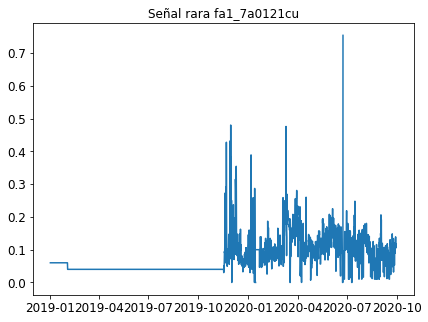

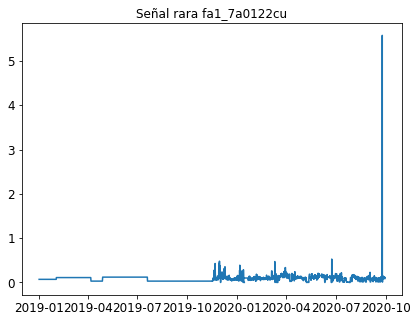

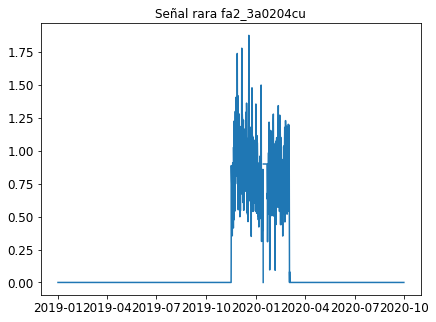

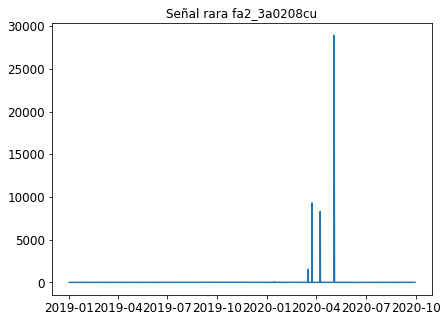

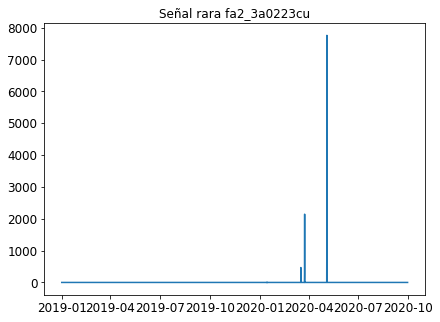

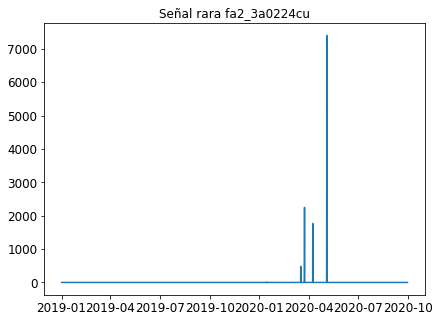

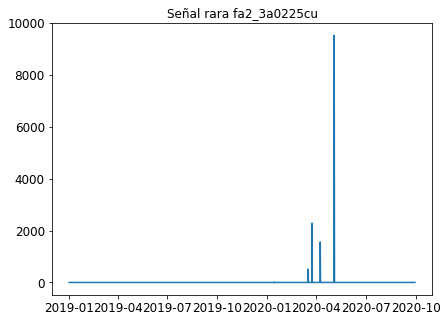

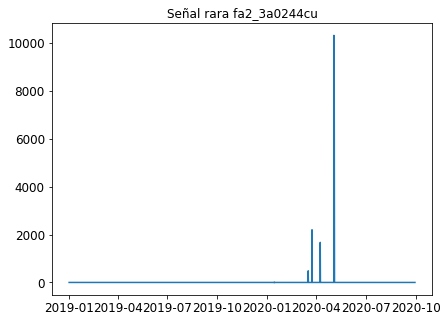

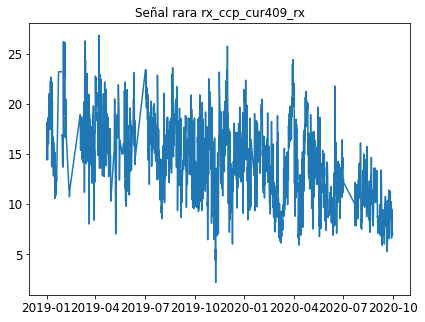

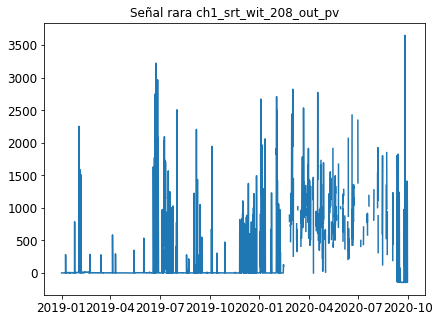

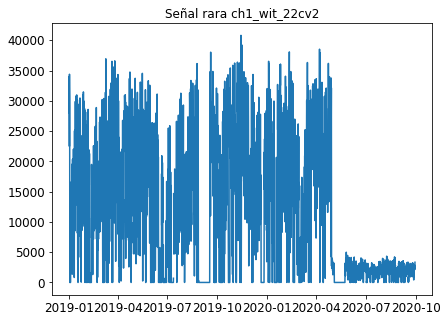

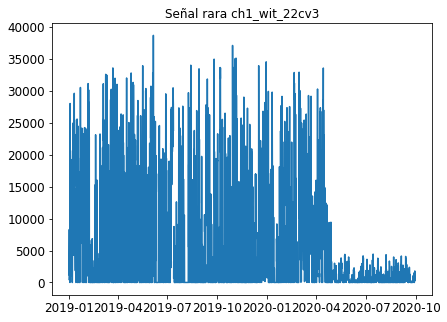

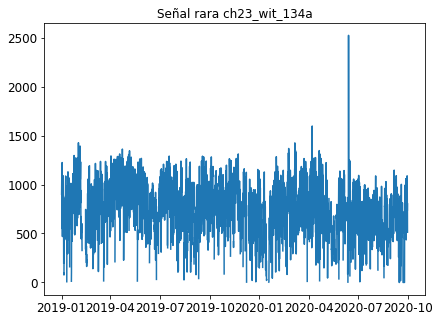

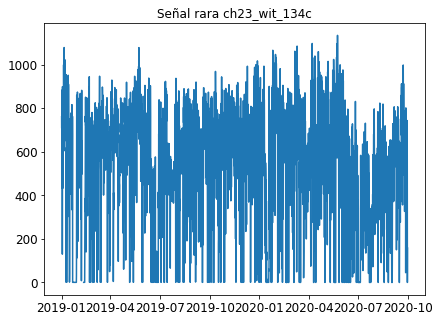

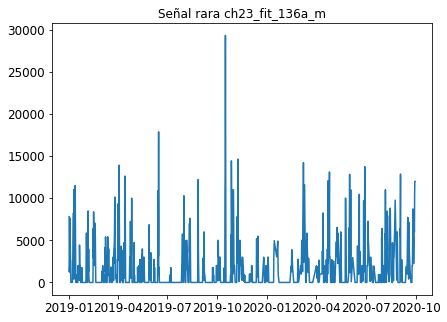

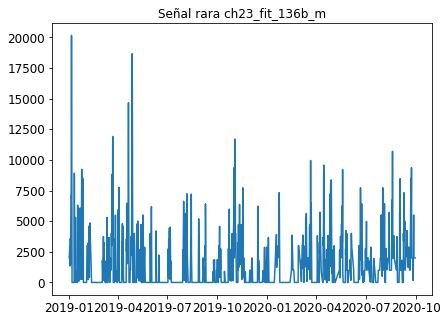

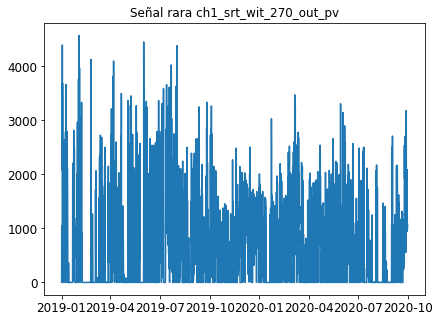

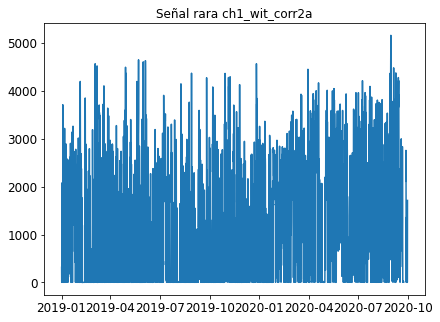

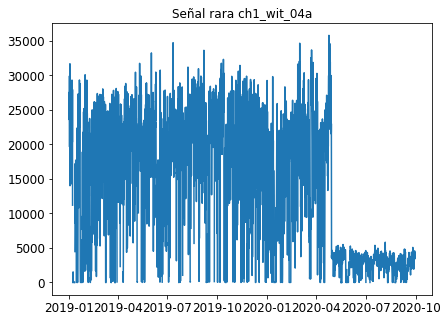

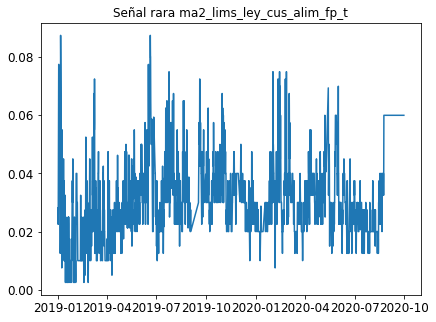

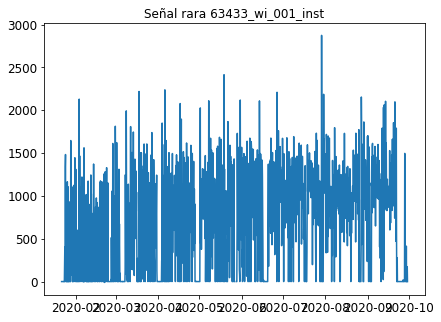

In [29]:
for i in df_analisis.columns: 
    if (df[i].loc[:'2020-05'].mean()/df[i].loc['2020-05':].mean()>=1.1) or (df[i].loc[:'2020-05'].mean()/df[i].loc['2020-05':].mean()<=0.9):
        print(i)
        fig = plt.figure(figsize=(15,5))

        ax1 = fig.add_subplot(121)
        ax1.plot(df[i])
        #ax1.set_ylim(target_min,target_max)
        #ax1.set_xlabel('jjjs')
        #myFmt = mdates.DateFormatter('%m/%y')
        #ax1.xaxis.set_major_formatter(myFmt)
        ax1.set_title('Señal rara '+i)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='timestamp'>

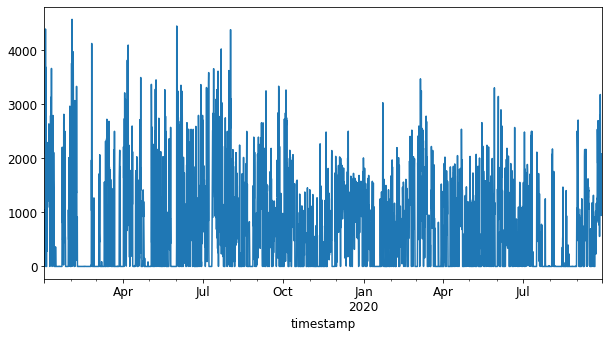

In [33]:
df['ch1_srt_wit_270_out_pv'].plot()

In [38]:
df_analisis[df_analisis<0]=0

In [40]:
df_analisis=[(df_analisis>df_analisis.quantile(.01))

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


ma2_3wic110                   0.000000
ma2_3wic210                   1.096476
ma0_2wic14z                   0.000000
ma0_2wic14a                   0.000000
ma0_2wic14b                   0.000000
                                ...   
rx_cp_cuc114                  0.030000
rx_cp_cuc115                  0.000000
rx_cp_cuc116                  0.030000
ma2_lims_ley_cus_alim_fp_t    0.007500
63433_wi_001_inst             0.000000
Name: 0.01, Length: 72, dtype: float64

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='timestamp'>

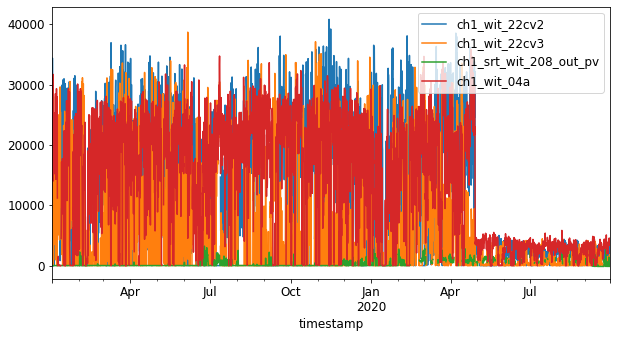

In [36]:
tags=['ch1_wit_22cv2',
'ch1_wit_22cv3',
'ch1_srt_wit_208_out_pv',
'ch1_wit_04a'
]
df[tags].plot()

## Choose target and limits

In [44]:
target = td.select('target', 's17_target')[0]

target_min = 1000
target_max = 3200
target_min_count = 2

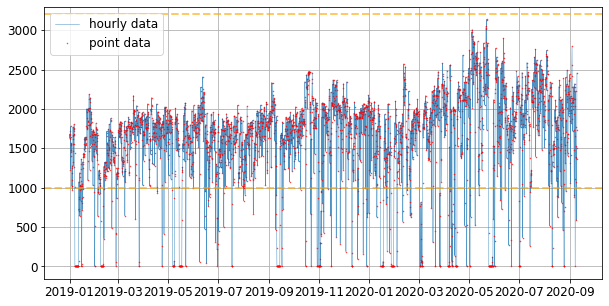

In [45]:
plt.plot(df[target], '-', markersize=2, label='hourly data', alpha=0.8, lw=0.5)
plt.plot(df[target], '.', markersize=1, color='r', label='point data', alpha=0.8)
#xmin = "2020-02"
#xmax = "2020-07"
#plt.xlim(xmin=xmin, xmax=xmax)
plt.axhline(y=target_min, color='orange', lw=2, alpha=0.6, linestyle='--')
plt.axhline(y=target_max, color='orange', lw=2, alpha=0.6, linestyle='--')
plt.grid()
plt.legend()

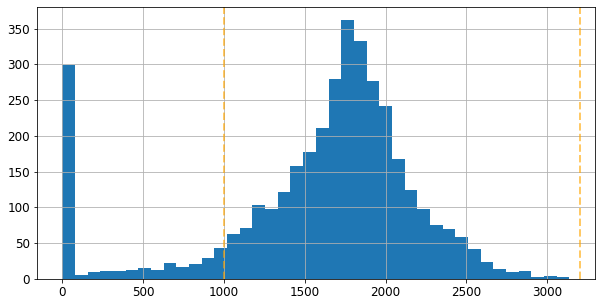

In [46]:
df[target].hist(bins=40)
plt.axvline(x=target_min, color='orange', lw=2, alpha=0.6, linestyle='--')
plt.axvline(x=target_max, color='orange', lw=2, alpha=0.6, linestyle='--')

## Set model variables

## Include/exclude min/max and date ranges

In [1]:
model_feat = td.select('s17_feature')


#Min Max and date ranges

feat_filt = df[df[target] > target_min]
feat_filt = feat_filt[feat_filt[target] < target_max]
print(feat_filt.shape)

# exclude_period = ["2020-06-15", "2020-10"]
# feat_filt = feat_filt.loc[(feat_filt.index < exclude_period[0]) | (feat_filt.index > exclude_period[1])]

start_from = "2018-06-15"
feat_filt = feat_filt.loc[feat_filt.index > start_from]

#Define X, y

begin_test = '2020-07-25'

model_feat = list(set(model_feat).intersection(feat_filt.columns))

X = feat_filt[model_feat]
y = feat_filt[target]



metrics=pd.DataFrame(columns=['mape','r2_score','mean_squared_error','root_mean_squared_error'], index=range(0,20))

for i in range(0,10):
    
    X_train, X_test, y_train, y_train_pred, y_test, y_test_pred, trained_model = train_model(X, y, begin_test, niter=300, SEED2=randint(1,2000))
    metrics.iloc[i,0]= mape(y_test,y_test_pred)
    metrics.iloc[i,1]=  r2_score(y_test,y_test_pred)
    metrics.iloc[i,2]= mean_squared_error(y_test,y_test_pred)
    metrics.iloc[i,3]= np.sqrt(mean_squared_error(y_test,y_test_pred))

print(metrics)


print(X.shape)

/miniconda/envs/optimus/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'td' is not defined

## Define X, y

(3208, 50)


In [50]:
np.std(y) / np.mean(y)

0.20103798467658635

## Baseline 1: use train average

In [51]:
y_train_mean = y.loc[:begin_test].mean()
y_test = y.loc[begin_test:]
predict = np.ones(len(y_test)) * y_train_mean
df_baseline1 = pd.DataFrame({'y_test': y_test, 'mean_pred': predict})
y1, y2 = df_baseline1['y_test'], df_baseline1['mean_pred']

In [52]:
y_train_mean

1783.4484541556953

mape: 19.128612611616365
r2_score: -0.14811873075288506
mean_squared_error: 179672.10262750648
root_mean_squared_error: 423.87746180648304


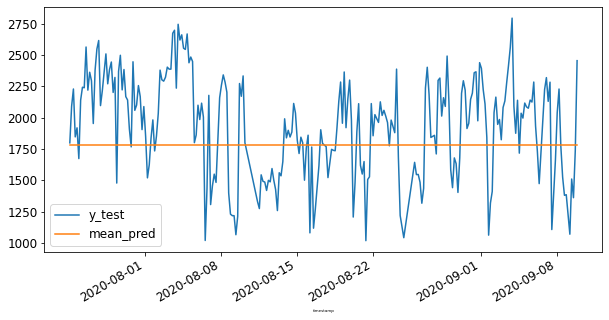

In [53]:
df_baseline1.plot()
y1, y2 = df_baseline1['y_test'], df_baseline1['mean_pred']

print(f"mape: {mape(y1, y2)}")
print(f"r2_score: {r2_score(y1, y2)}")
print(f"mean_squared_error: {mean_squared_error(y1, y2 )}")
print(f"root_mean_squared_error: {np.sqrt(mean_squared_error(y1, y2))}")

## Baseline 2: Predict previous shift

In [54]:
y_test = y.loc[begin_test:]
predict = y.loc[begin_test:].shift(1)
df_baseline2 = pd.DataFrame({'y_test': y_test, 'prev_shift': predict})
df_baseline2 = df_baseline2.iloc[1:, :]

y1, y2 = df_baseline2['y_test'], df_baseline2['prev_shift']

print(f"mape: {mape(y1, y2)}")
print(f"r2_score: {r2_score(y1, y2)}")
print(f"mean_squared_error: {mean_squared_error(y1, y2 )}")
print(f"root_mean_squared_error: {np.sqrt(mean_squared_error(y1, y2))}")

mape: 13.666870030816016
r2_score: 0.3209507694836975
mean_squared_error: 106628.20736105378
root_mean_squared_error: 326.5397485162469


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:xlabel='timestamp'>

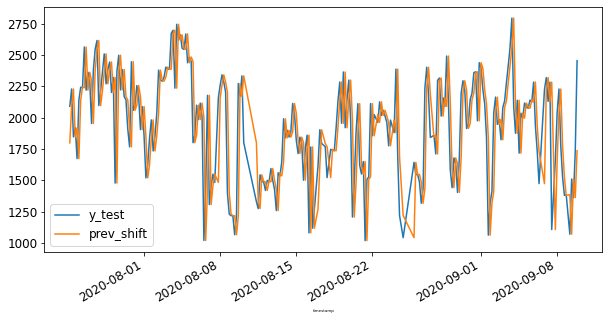

In [55]:
df_baseline2.plot()

In [56]:
y_test = y.loc[begin_test:]
predict = y.loc[begin_test:].shift(1)
df_baseline2 = pd.DataFrame({'y_test': y_test, 'prev_shift': predict})
df_baseline2 = df_baseline2.iloc[1:, :]

y1, y2 = df_baseline2['y_test'], df_baseline2['prev_shift']

print(f"mape: {mape(y1, y2)}")
print(f"r2_score: {r2_score(y1, y2)}")
print(f"mean_squared_error: {mean_squared_error(y1, y2 )}")
print(f"root_mean_squared_error: {np.sqrt(mean_squared_error(y1, y2))}")


model_feat = td.select('s17_feature')
# tags_agua = ['calc_sum_s16_water_add', 'calc_sum_m5_water_add', 'calc_s16_sol']
# tags_solidos_5to = ['ma2_3kic0105']
# tags_solidos_nuevos = ['calc_s16_sol'], # 'calc_s16_sol_alim']
# tags_solidos = ['ma2_3kic118', 'ma2_3si19']
# leakage = ['ma2_3si154', 'ma2_3ji155']
# tags_remove = tags_agua 
# model_feat = list(set(model_feat).difference(tags_remove))

X = feat_filt[model_feat]
y = feat_filt[target]
print(X.shape)

(3208, 50)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 892 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 610 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 502 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.2min finished


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 924 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


       mape  r2_score mean_squared_error root_mean_squared_error
0   10.0342  0.379422              97741                 312.636
1   8.50387  0.565851            68378.4                 261.493
2    9.0017  0.530735            73909.2                 271.862
3   9.54648  0.477941            82224.3                 286.748
4   8.77766  0.530467            73951.3                  271.94
5   8.94004  0.545474            71587.7                 267.559
6   9.10971  0.542547            72048.8                 268.419
7   8.56664  0.571394            67505.3                 259.818
8   9.52324  0.500374              78691                 280.519
9   9.05832  0.513872            76565.1                 276.704
10      NaN       NaN                NaN                     NaN
11      NaN       NaN                NaN                     NaN
12      NaN       NaN                NaN                     NaN
13      NaN       NaN                NaN                     NaN
14      NaN       NaN    

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:>

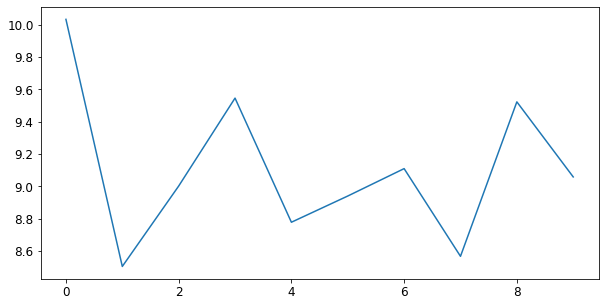

In [35]:

metrics['mape'].plot()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


mape: 9.058323373824313
r2_score: 0.5138721640212505
mean_squared_error: 76565.05789942642
root_mean_squared_error: 276.70391739082123


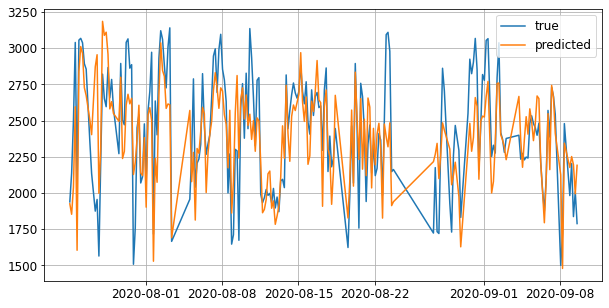

In [37]:
plot_ts(y_test, y_test_pred)
print_metrics(y_test, y_test_pred)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


mape: 4.104635359673698
r2_score: 0.8925726284026019
mean_squared_error: 13817.72557874734
root_mean_squared_error: 117.5488221070179


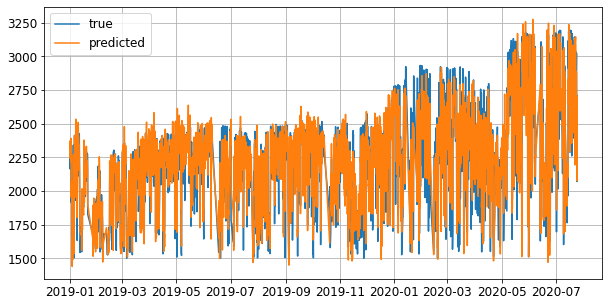

In [36]:
plot_ts(y_train, y_train_pred)
print_metrics(y_train, y_train_pred)

In [27]:
trained_model.best_estimator_

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


XGBRegressor(colsample_bytree=0.8, gamma=1.5, learning_rate=0.2,
             n_estimators=86, n_jobs=-1, objective='reg:squarederror',
             random_state=3, subsample=0.5)

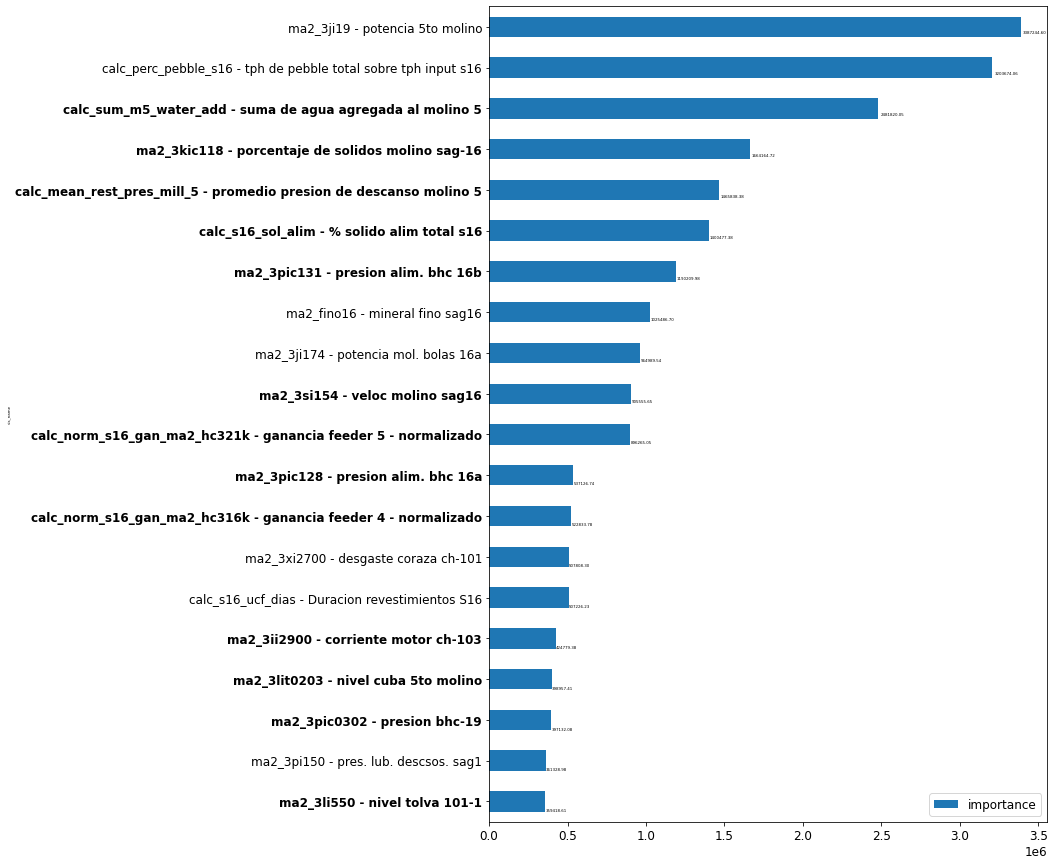

In [28]:
top_feat_2 = get_feat_importance(trained_model, td)

In [38]:
td.

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


['ma2_3hic105',
 'ma2_3hic106',
 'ma2_3hic107',
 'ma2_3hic205',
 'ma2_3hic206',
 'ma2_3hic207',
 'ma2_3hic411',
 'ma2_3hic422',
 'ma2_3hic720_op',
 'ma2_3hic730_op',
 'ma2_3hic760_op',
 'ma2_3hic770_op',
 'ma2_3pic0302_move',
 'ma2_3si154',
 'ma2_3si19',
 'ma2_3si254',
 'ma2_3si591',
 'ma2_3si596',
 'ma2_3si721a',
 'ma2_3si726a',
 'ma2_3si731a',
 'ma2_3si736a',
 'ma2_3si761a',
 'ma2_3si766a',
 'ma2_3si771a',
 'ma2_3si776a',
 'ma2_3xl0003hic',
 'ma2_3xl0004hic',
 'ma2_3xl0005hic',
 'ma2_3xl0006hic',
 'ma2_3xl0007hic',
 'ma2_3xl0008hic',
 'ma2_3lic122',
 'ma2_3lic222',
 'ma2_3ji101',
 'ma2_3ji102',
 'ma2_3ji103',
 'ma2_3ji155',
 'ma2_3ji174',
 'ma2_3ji187',
 'ma2_3ji19',
 'ma2_3ji255',
 'ma2_3ji274',
 'ma2_3ji287',
 'ma2_3dpi2702',
 'ma2_3dpi2802',
 'ma2_3dpi2902',
 'ma2_3pic128',
 'ma2_3pic131',
 'ma2_3pic228',
 'ma2_3pic231',
 'ma2_3ml0001_ci_sp21',
 'ma2_3ml0001_ci_sp22',
 'ma2_3ml0001_ci_sp23',
 'ma2_3ml0001_ci_sp24',
 'ma2_3pi150',
 'ma2_3pi250',
 'ma2_3pic0302',
 'ma2_3kic0105',
 'ma2_3kic118',
 'ma2_3kic218',
 'ma2_3ps1016',
 'ma2_3ps1017',
 'ma2_3ps1018',
 'ma2_3ps1019',
 'ma2_3ps305a',
 'ma2_3ps305b',
 'ma2_3ps306a',
 'ma2_3ps306b',
 'ma2_3psasag1',
 'ma2_3psasag2',
 'ma2_3ffic118',
 'ma2_3ffic218',
 'ma2_3fi117',
 'ma2_3fic0105',
 'ma2_3fic0217',
 'ma2_3fic121',
 'ma2_3fic221',
 'ma2_3wi103',
 'ma2_3wi104',
 'ma2_3wi116',
 'ma2_3wi116r',
 'ma2_3wi216f',
 'ma2_3wi216r',
 'ma2_3wic0126',
 'ma2_3wic110',
 'ma2_3wic210',
 'fa2_3ai1023m',
 'fa2_3ps1023m',
 'ma2_hc311k',
 'ma2_hc316k',
 'ma2_hc321k',
 'ma2_hc326k',
 'ma2_hc331k',
 'ma2_hc336k',
 'ma2_fino16',
 'ma2_fino17',
 'ma2_grueso16',
 'ma2_grueso17',
 'ma2_interm16',
 'ma2_interm17',
 'ma2_3grmt100',
 'ma2_3grmt101',
 'ma2_3grmt102',
 'ma2_3grmt103',
 'ma2_3grmt104',
 'ma2_3grmt105',
 'ma2_3grmt106',
 'ma2_3grmt107',
 'ma2_3grmt108',
 'ma2_3grmt109',
 'ma2_3grmt200',
 'ma2_3grmt201',
 'ma2_3grmt202',
 'ma2_3grmt203',
 'ma2_3grmt204',
 'ma2_3grmt205',
 'ma2_3grmt206',
 'ma2_3grmt207',
 'ma2_3grmt208',
 'ma2_3grmt209',
 'ma2_3zi2700',
 'ma2_3zi2800',
 'ma2_3zi2900',
 'ma2_cic_fun_s16a',
 'ma2_cic_fun_s16b',
 'ma2_cic_fun_s17a',
 'ma2_cic_fun_s17b',
 'ch1_lit286',
 'ch1_litsonicopl2w',
 'ma0_2ji28a',
 'ma0_2ji28b',
 'ma0_2ji28c',
 'ma0_2ji28d',
 'ma0_2ji28e',
 'ma0_2ji28f',
 'ma0_2ji28g',
 'ma0_2ji28h',
 'ma0_2ji28j',
 'ma0_2ji28k',
 'ma0_2ji28l',
 'ma0_2ji28m',
 'ma0_2ji28n',
 'ma0_2pic27a',
 'ma0_2pic27b',
 'ma0_2pic27c',
 'ma0_2pic27d',
 'ma0_2pic27e',
 'ma0_2pic27f',
 'ma0_2pic27g',
 'ma0_2pic27h',
 'ma0_2pic27j',
 'ma0_2pic27k',
 'ma0_2pic27l',
 'ma0_2pic27m',
 'ma0_2pic27z',
 'ma0_2ps1000',
 'ma0_2ps1001',
 'ma0_2ps1002',
 'ma0_2ps1003',
 'ma0_2ps1004',
 'ma0_2ps1005',
 'ma0_2ps1006',
 'ma0_2ps1007',
 'ma0_2ps1008',
 'ma0_2ps1009',
 'ma0_2ps1010',
 'ma0_2ps1011',
 'ma0_2ps1012',
 'ma0_2pvpsa',
 'ma0_2pvpsb',
 'ma0_2pvpsc',
 'ma0_2pvpsd',
 'ma0_2pvpse',
 'ma0_2pvpsg',
 'ma0_2pvpsh',
 'ma0_2pvpsj',
 'ma0_2pvpsk',
 'ma0_2pvpsl',
 'ma0_2pvpsm',
 'ma0_2pvpsz',
 'ma1_7ps1013',
 'ma1_7ps1014',
 'ma1_7ps1015',
 'ma1_xpsc1325',
 'ma1_xpsc1425',
 'ma1_xpsc1531',
 'ma1_xpi1312',
 'ma1_xpi1412',
 'ma1_xpi1515',
 'ma1_xji1317',
 'ma1_xji1417',
 'ma1_xji1517',
 'ma0_2wic14z',
 'ma0_2wic14a',
 'ma0_2wic14b',
 'ma0_2wic14c',
 'ma0_2wic14d',
 'ma0_2wic14e',
 'ma0_2wic14f',
 'ma0_2wic14g',
 'ma0_2wic14h',
 'ma0_2wic14j',
 'ma0_2wic14k',
 'ma0_2wic14l',
 'ma0_2wic14m',
 'ma1_xwc1304_sp',
 'ma1_xwc1404_sp',
 'ma1_xwc1506_sp',
 'ma0_num_seccion_func',
 'ma1_num_seccion_func',
 'ma0_cic_fun_s0',
 'ma0_cic_fun_s1',
 'ma0_cic_fun_s10',
 'ma0_cic_fun_s11',
 'ma0_cic_fun_s12',
 'ma0_cic_fun_s2',
 'ma0_cic_fun_s3',
 'ma0_cic_fun_s4',
 'ma0_cic_fun_s5',
 'ma0_cic_fun_s6',
 'ma0_cic_fun_s7',
 'ma0_cic_fun_s8',
 'ma0_cic_fun_s9',
 'ma1_cic_fun_s13',
 'ma1_cic_fun_s14',
 'ma1_cic_fun_s15',
 'ma1_xfc1308',
 'ma1_xfc1408',
 'ma1_xfc1510',
 'ma1_xlc1309',
 'ma1_xlc1409',
 'ma1_xlc1507',
 'ma0_2ffic20a_sp',
 'ma0_2ffic20b_sp',
 'ma0_2ffic20c_sp',
 'ma0_2ffic20d_sp',
 'ma0_2ffic20e_sp',
 'ma0_2ffic20